# Data Mining Assignment 2

# Introduction

### Contextualizing the Problem

Data mining is an essential practice for uncovering patterns and insights from large datasets, enabling businesses to make data-driven decisions. This approach is valuable in marketing, where understanding customer behavior can lead to more targeted campaigns and optimized resource allocation.

In 2023, successful marketing campaigns' median profit-based return on investment (ROI) worldwide reached 2.43 U.S. dollars, meaning global advertisers profited, on average, 2.43 dollars for every dollar they spent on those strategies (Statista, 2024). This highlights the key role played by marketing campaigns in increasing the profitability of an orgnisation.

This project focuses to apply data mining techniques to the marketing domain, specifically focusing on a dataset provided by a food delivery company that offers various product categories through multple sales channels. The dataset is derived from Kaggle repository. It includes the demographic data gathered from 2,240 customers who were randomly selected to promote a product, the results recorded as customer responses (purchases or non-purchases) for five marketing campaigns conducted by a company, the amount spent on multiple product categories and the sales channel used to make the purchase.

Despite generating revenue from respondents, the overall campaign ran at a loss. So, our project forcuses on analysing how to make the next hypothetical promotion a success by filtering the targeting audience. 

### Problem Statement

**Classification:** Given the data from a sample marketing campaign, how can we accurately predict which customers are most likely to respond to future campaigns?

**Clustering Analyis:** What are the distinct customer segments based on their demographic information, purchasing behavior, and campaign response?

**Association Analysis:** Are there associations between certain demographic features (e.g., marital status, number of children) and purchasing preferences?

### TODO: Refine Business Objectives and Value Proposition (Business Understanding)

The main goal is to build a robust predictive model that can identify customers most likely to respond to future campaigns. This will enable the marketing team to strategically target high-potential customers, enhancing campaign efficiency and profitability. Achieving this goal involves understanding the characteristics of past respondents and using this insight to refine future efforts. The success of this initiative is expected to justify the value of data-driven marketing strategies and contribute to sustained revenue growth.

Key business objectives include:

- Increasing Campaign Profitability: By accurately predicting respondents, the company can focus its marketing efforts on customers who are more likely to engage, minimizing costs and maximizing revenue.

- Customer Insight and Segmentation: Gaining a deeper understanding of customer behaviors and attributes that correlate with positive responses to marketing campaigns.

- Strategic Resource Allocation: Enabling the marketing team to allocate budget and resources more effectively.

### Data Mining Methodology: CRISP-DM Approach

To ensure a systematic and effective analysis, we will adopt the CRISP-DM (Cross-Industry Standard Process for Data Mining) framework. This method structures the project into six key phases:
<div style="text-align: center;">
    <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b9/CRISP-DM_Process_Diagram.png/639px-CRISP-DM_Process_Diagram.png" alt="CRISP-DM Process" style="width:400px;height:400px;margin-top: 20px;">
</div>

1. Business Understanding: Define the project’s goals and success criteria, focusing on predicting customer responses and maximizing campaign profit. The aim is to ensure targeted marketing that improves the return on investment (ROI).

2.  Data Understanding: Explore the dataset, which includes socio-demographic and firmographic information about customers and their responses to the pilot campaign. This step will involve analyzing data distributions, correlations, and initial insights into what differentiates respondents from non-respondents.

3.  Data Preparation: Prepare the dataset for modeling by handling missing values, outliers, and data transformations. Categorical variables will be encoded, and numerical features will be scaled to enhance model performance. This phase also includes creating new features if necessary to capture additional insights (e.g., interaction terms between relevant variables).

4.  Modeling: Develop multiple predictive models, such as logistic regression, decision tree-based models, and ensemble methods (e.g., Random Forest). Train these models using a split of the data into training and test sets, followed by cross-validation and hyperparameter tuning for optimization.

5.  Evaluation: Assess the models based on key performance metrics, such as accuracy, precision, recall, F1-score, and ROC-AUC. The goal is to select the best-performing model that aligns with the business objectives. Additionally, analyze potential biases or limitations in the model’s performance.

6.  Deployment: While deployment is beyond the scope of this initial analysis, successful implementation could lead to integrating the predictive model into the company’s marketing platform for real-time targeting and campaign management.


# ABOVE TEXT IS GOAT GENERATED WE NEED TO READ THROUGH IT AND MAKE SURE IT IS GOOD !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

### Importing modules

In [97]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pandas as pd
import warnings
import inflection
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from scikeras.wrappers import KerasClassifier
import datetime

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)   

# This is the year the data was collected
DATA_YEAR = datetime.datetime(year=2015,
                  month=1,
                  day=1)

### Data Understanding

`todo:` Discuss potential challenges, limitations, and propose
solutions related to data quality, computational complexity, and data
mining techniques, and discuss approaches of how to tackle and
address them through your approach.

In [98]:
# First create the folder "data" and add the data source into it
def check_data_folder_dataset_load_df(dataset_csv_name="marketing_campaign.csv"):
    if not os.path.isdir("data"):
        raise Exception("there is no data folder ")
    if not os.path.exists(f"data/{dataset_csv_name}"):
        raise Exception(f"there is no {dataset_csv_name} in the data folder ")
    
    return pd.read_csv(f"data/{dataset_csv_name}", delimiter=";")
    
df = check_data_folder_dataset_load_df()
df

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
0            0  2012-09-04       58       635         88              546   
1            1  2014-03-08       38        11          1                6   
2            0  2013-08-21       26       426         49              127   
3            0  2014-02-10       26        11          4               20   
4            0  2014-01-19       94       173         43              118   
...        ...         ...      ...       ...        ...              ...   
2235         1  2013-06-13       46       709         43              182   
2236         1  2014-06-10       56       406          0               30   
2237         0  2014-01-25       91       908         48              217   
2238         1  2014-01-24        8       428         30              214   
2239         1  2012-10-15       40        84          3               61   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0                 172                88            88                  3   
1                   2                 1             6                  2   
2                 111                21            42                  1   
3                  10                 3             5                  2   
4                  46                27            15                  5   
...               ...               ...           ...                ...   
2235               42               118           247                  2   
2236                0                 0             8                  7   
2237               32                12            24                  1   
2238               80                30            61                  2   
2239                2                 1            21                  3   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0                   8                   10                  4   
1                   1                    1                  2   
2                   8                    2                 10   
3                   2                    0                  4   
4                   5                    3                  6   
...               ...                  ...                ...   
2235                9                    3                  4   
2236                8                    2                  5   
2237                2                    3                 13   
2238                6                    5                 10   
2239                3                    1                  4   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
0                     7             0             0             0   
1                     5             0             0             0   
2                     4             0             0             0   
3                     6             0             0             0   
4                     5             0             0             0   
...                 ...           ...           ...           ...   
2235                  5             0     

The dataset contains 29 columns and 2240 rows. The column descriptions can be found below:

1. ID - Customer’s id
2. Year_Birth - Customer’s year of birth
3. Education - Customer’s level of education
4. Marital_Status - Customer’s marital status
5. Income - Customer’s yearly household income
6. Kidhome - Number of small children in customer’s household
7. Teenhome - Number of teenagers in customer’s household
8. Dt_Customer - Date of customer’s enrolment with the company
9. Recency - Number of days since the last purchase
10. MntWines - Amount spent on wine products in the last 2 years
11. MntFruits - Amount spent on fruits products in the last 2 years
12. MntMeatProducts - Amount spent on meat products in the last 2 years
13. MntFishProducts - Amount spent on fish products in the last 2 years
14. MntSweetProducts - Amount spent on sweet products in the last 2 years
15. MntGoldProds - Amount spent on gold products in the last 2 years
16. NumDealsPurchases - Number of purchases made with discount
17. NumWebPurchases - Number of purchases made through company’s web site
18. NumCatalogPurchases - Number of purchases made using catalogue
19. NumStorePurchases - Number of purchases made directly in stores
20. NumWebVisitsMonth - Number of visits to company’s web site in the last month
21. AcceptedCmp3 - 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
22. AcceptedCmp4 - 1 if customer accepted the offer in the 4th campaign, 0 otherwise
23. AcceptedCmp5 - 1 if customer accepted the offer in the 5th campaign, 0 otherwise
24. AcceptedCmp1 - 1 if customer accepted the offer in the 1st campaign, 0 otherwise
25. AcceptedCmp2 - 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
26. Complain - 1 if customer complained in the last 2 years, 0 otherwise
27. Z_CostContact - Cost to contact a customer
28. Z_Revenue - Revenue after client accepting campaign
29. Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise

We can look at the descriptive statistics of the dataframe below:

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

From this we can see that `Education`, `Marital_Status` and `Dt_customer` are non numeric values.

Now we can take a look at the descriptive statistics of the numerical values:

In [100]:
df.describe().transpose().round(2)

count      mean       std     min       25%      50%  \
ID                   2240.0   5592.16   3246.66     0.0   2828.25   5458.5   
Year_Birth           2240.0   1968.81     11.98  1893.0   1959.00   1970.0   
Income               2216.0  52247.25  25173.08  1730.0  35303.00  51381.5   
Kidhome              2240.0      0.44      0.54     0.0      0.00      0.0   
Teenhome             2240.0      0.51      0.54     0.0      0.00      0.0   
Recency              2240.0     49.11     28.96     0.0     24.00     49.0   
MntWines             2240.0    303.94    336.60     0.0     23.75    173.5   
MntFruits            2240.0     26.30     39.77     0.0      1.00      8.0   
MntMeatProducts      2240.0    166.95    225.72     0.0     16.00     67.0   
MntFishProducts      2240.0     37.53     54.63     0.0      3.00     12.0   
MntSweetProducts     2240.0     27.06     41.28     0.0      1.00      8.0   
MntGoldProds         2240.0     44.02     52.17     0.0      9.00     24.0   
NumDealsPurchases    2240.0      2.33      1.93     0.0      1.00      2.0   
NumWebPurchases      2240.0      4.08      2.78     0.0      2.00      4.0   
NumCatalogPurchases  2240.0      2.66      2.92     0.0      0.00      2.0   
NumStorePurchases    2240.0      5.79      3.25     0.0      3.00      5.0   
NumWebVisitsMonth    2240.0      5.32      2.43     0.0      3.00      6.0   
AcceptedCmp3         2240.0      0.07      0.26     0.0      0.00      0.0   
AcceptedCmp4         2240.0      0.07      0.26     0.0      0.00      0.0   
AcceptedCmp5         2240.0      0.07      0.26     0.0      0.00      0.0   
AcceptedCmp1         2240.0      0.06      0.25     0.0      0.00      0.0   
AcceptedCmp2         2240.0      0.01      0.11     0.0      0.00      0.0   
Complain             2240.0      0.01      0.10     0.0      0.00      0.0   
Z_CostContact        2240.0      3.00      0.00     3.0      3.00      3.0   
Z_Revenue            2240.0     11.00      0.00    11.0     11.00     11.0   
Response             2240.0      0.15      0.36     0.0      0.00      0.0   

                          75%       max  
ID                    8427.75   11191.0  
Year_Birth            1977.00    1996.0  
Income               68522.00  666666.0  
Kidhome                  1.00       2.0  
Teenhome                 1.00       2.0  
Recency                 74.00      99.0  
MntWines               504.25    1493.0  
MntFruits               33.00     199.0  
MntMeatProducts        232.00    1725.0  
MntFishProducts         50.00     259.0  
MntSweetProducts        33.00     263.0  
MntGoldProds            56.00     362.0  
NumDealsPurchases        3.00      15.0  
NumWebPurchases          6.00      27.0  
NumCatalogPurchases      4.00      28.0  
NumStorePurchases        8.00      13.0  
NumWebVisitsMonth        7.00      20.0  
AcceptedCmp3             0.00       1.0  
AcceptedCmp4             0.00       1.0  
AcceptedCmp5             0.00       1.0  
AcceptedCmp1             0.00       1.0  
AcceptedCmp2             0.00       1.0  
Complain                 0.00       1.0  
Z_CostContact            3.00       3.0  
Z_Revenue               11.00      11.0  
Response                 0.00       1.0

We can check for missing values in the dataset:

In [101]:
print("Missing data in the dataframe:")
print(df.isnull().sum())

Missing data in the dataframe:
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


Since 1% of the columns have Null values in them, we can safely remove them:

In [102]:
df = df.dropna()

Now, for consistency sake we transform all column names into camelcase

In [103]:
df.columns = [inflection.underscore(col) for col in df.columns]
df.columns

Index(['id', 'year_birth', 'education', 'marital_status', 'income', 'kidhome',
       'teenhome', 'dt_customer', 'recency', 'mnt_wines', 'mnt_fruits',
       'mnt_meat_products', 'mnt_fish_products', 'mnt_sweet_products',
       'mnt_gold_prods', 'num_deals_purchases', 'num_web_purchases',
       'num_catalog_purchases', 'num_store_purchases', 'num_web_visits_month',
       'accepted_cmp3', 'accepted_cmp4', 'accepted_cmp5', 'accepted_cmp1',
       'accepted_cmp2', 'complain', 'z_cost_contact', 'z_revenue', 'response'],
      dtype='object')

We can also check for the amount of unique values per column in our dataset, to see if maybe some data is redundant:

In [104]:
df.nunique()

id                       2216
year_birth                 59
education                   5
marital_status              8
income                   1974
kidhome                     3
teenhome                    3
dt_customer               662
recency                   100
mnt_wines                 776
mnt_fruits                158
mnt_meat_products         554
mnt_fish_products         182
mnt_sweet_products        176
mnt_gold_prods            212
num_deals_purchases        15
num_web_purchases          15
num_catalog_purchases      14
num_store_purchases        14
num_web_visits_month       16
accepted_cmp3               2
accepted_cmp4               2
accepted_cmp5               2
accepted_cmp1               2
accepted_cmp2               2
complain                    2
z_cost_contact              1
z_revenue                   1
response                    2
dtype: int64

From above we acn see `z_cost_contact` and `z_revenue` columns have only one value, as such we can drop those columns

In [105]:
df = df.drop(columns=['z_cost_contact', 'z_revenue'])

### Pairplot

In [106]:
# Selects response and continuous numeric columns with >3 unique values (e.g., excludes discrete variables like 'kidhome', 'teenhome'), ignoring 'id'
numerical_features = [col for col in df if col == 'response' or (df[col].dtype.kind in 'fi' and df[col].nunique() > 3) and col != 'id']

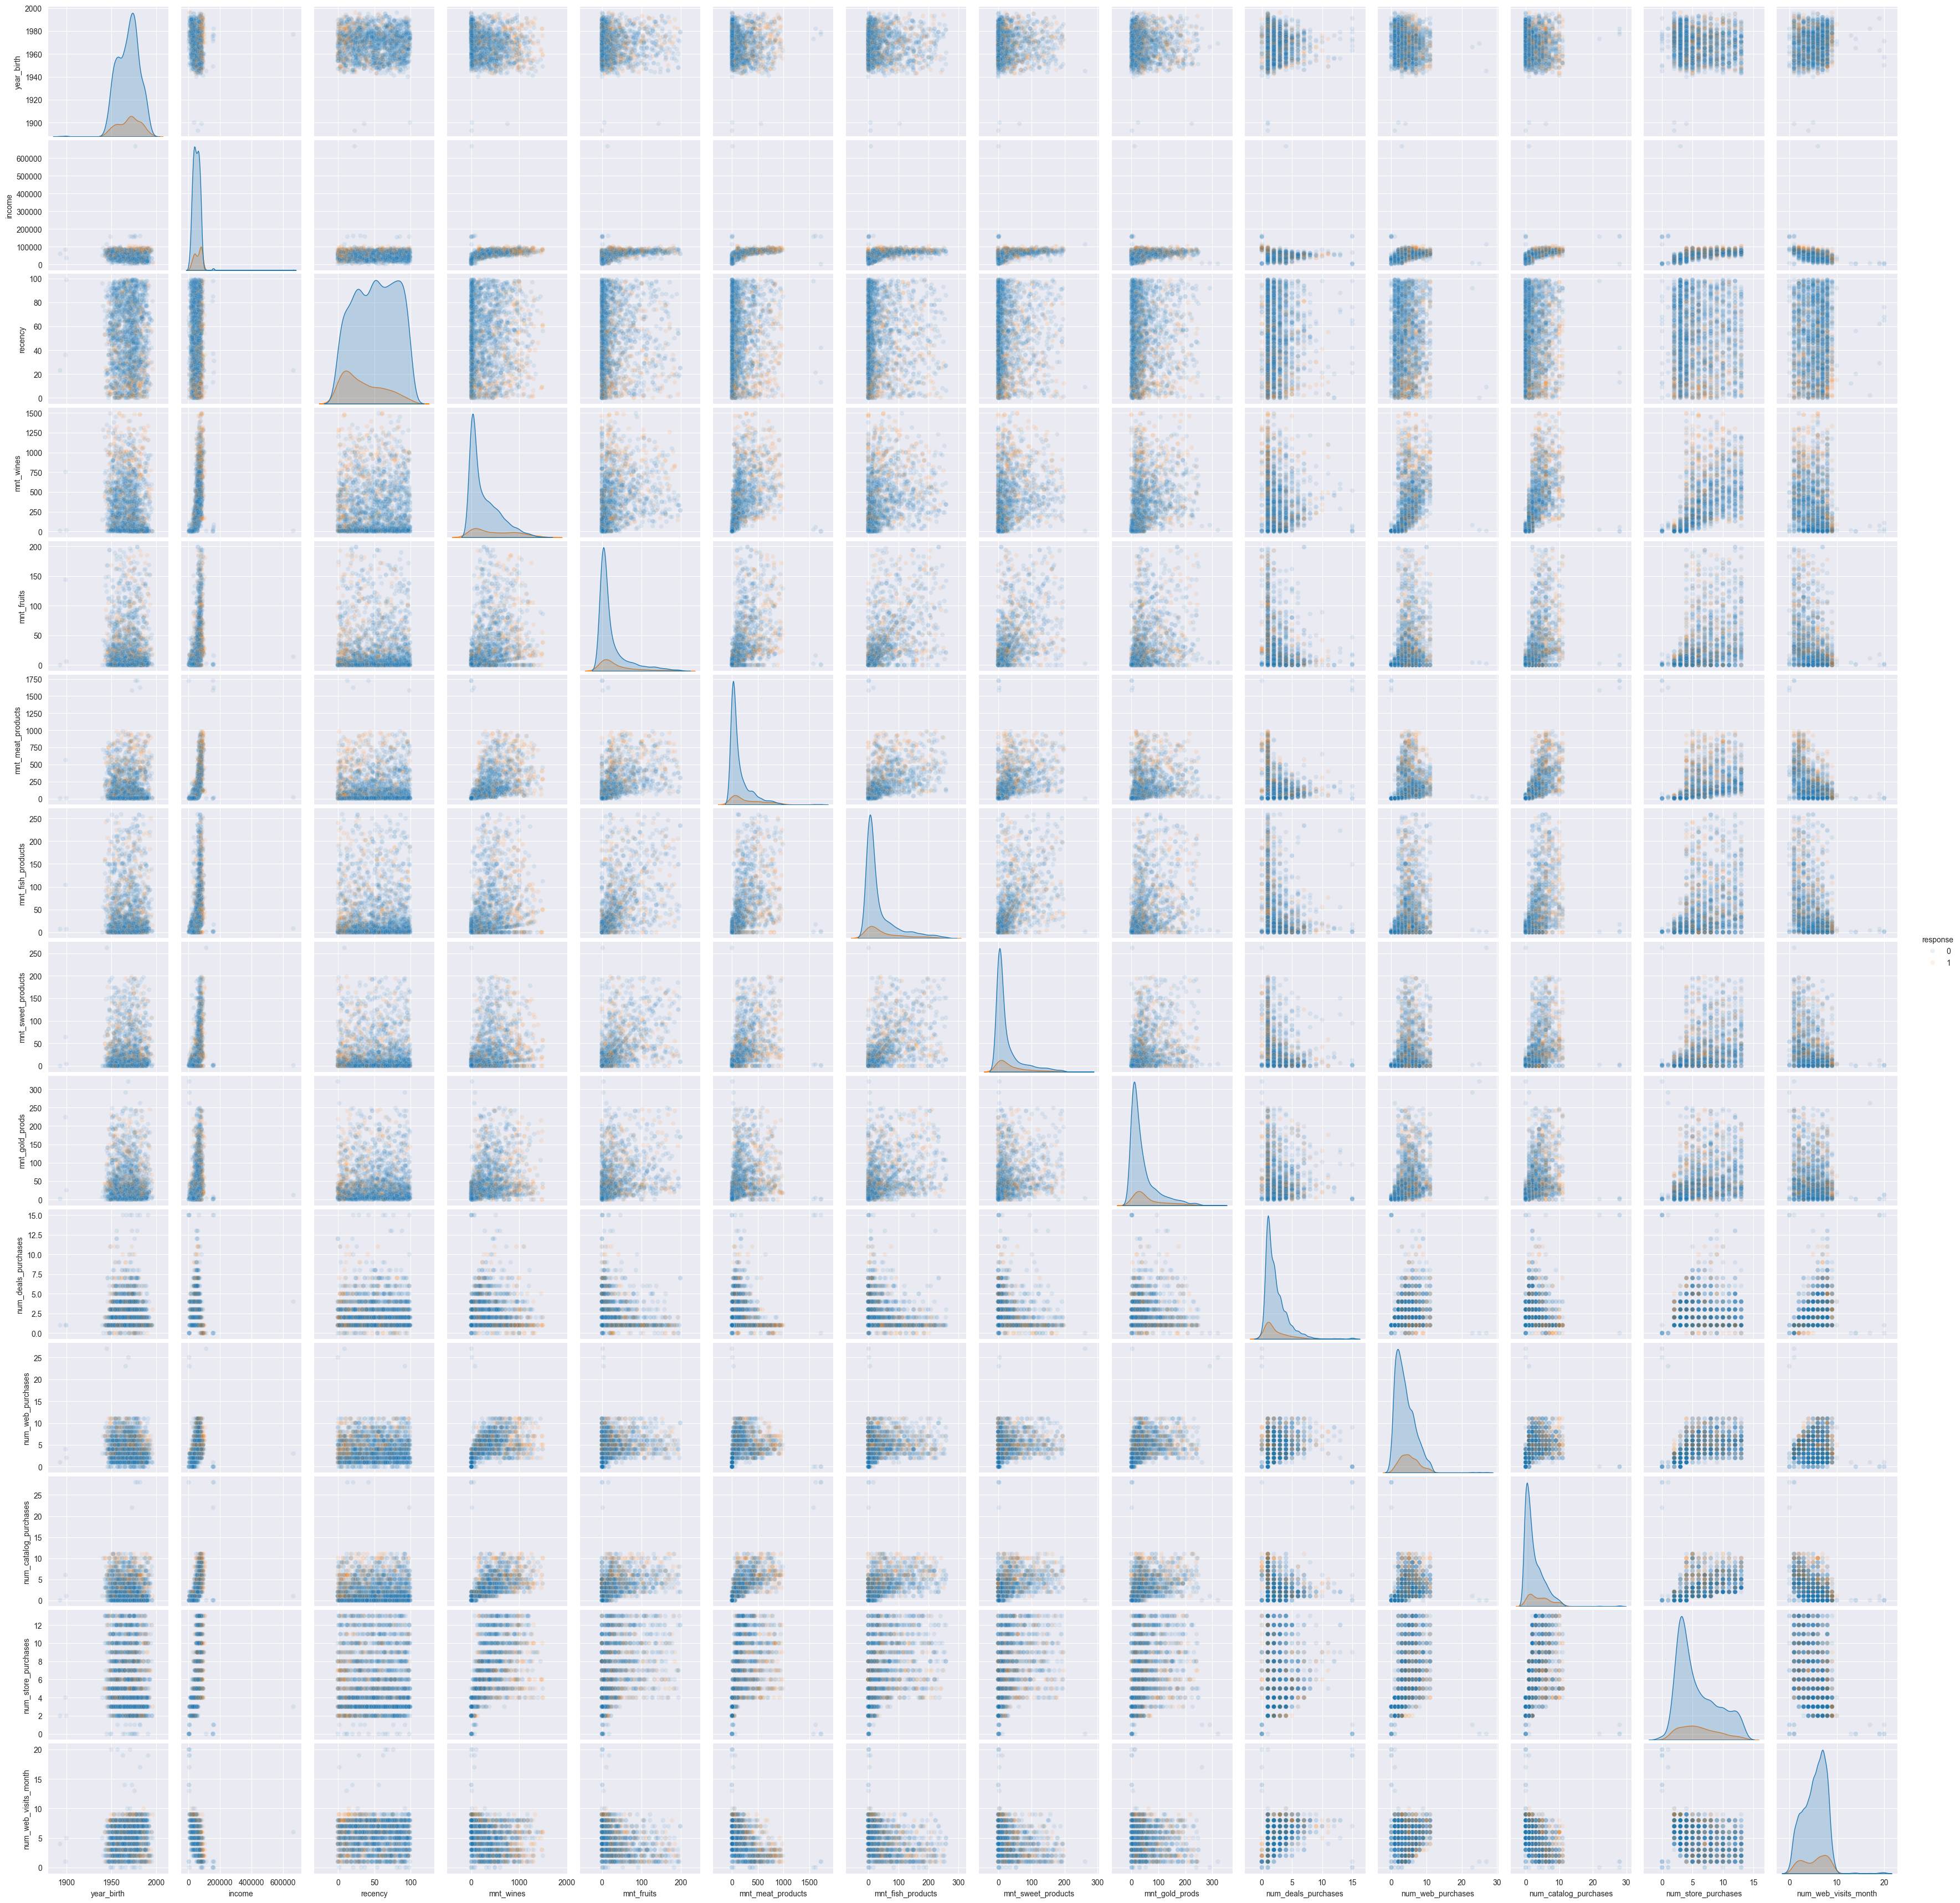

In [107]:
# Numerical Pairplot according to response variable
sns.pairplot(df[numerical_features], hue='response', plot_kws={'alpha':0.1})
plt.show()

`todo:` explain what is seen above

### Histogram

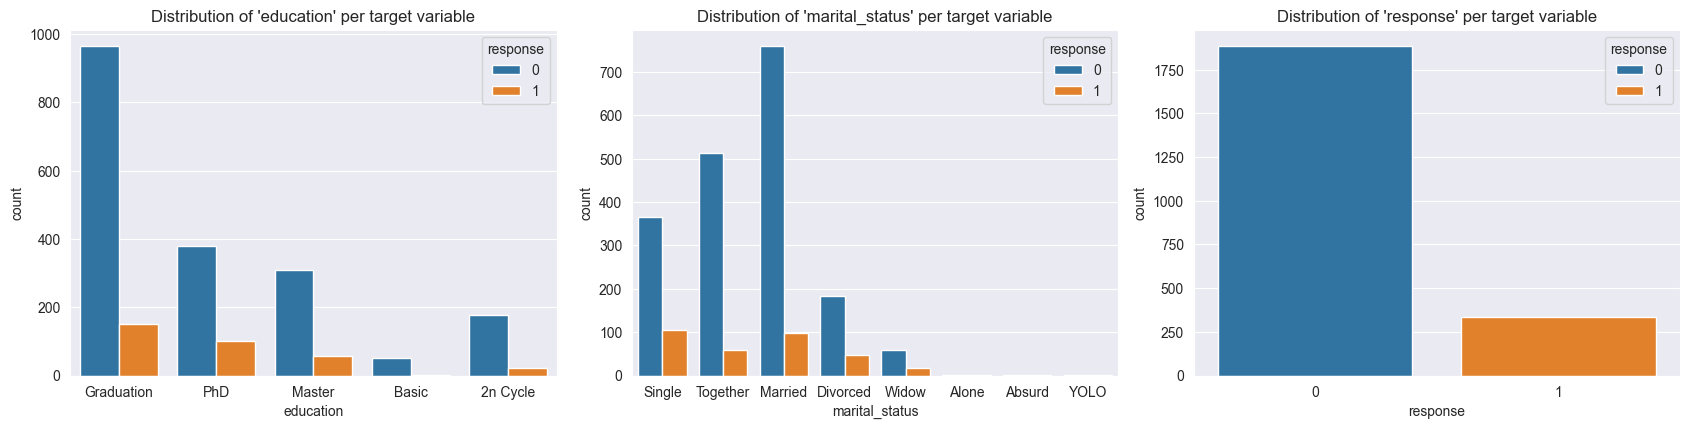

In [108]:
def create_histograms(df, columns, rows=1, cols=2):
    fig, axes = plt.subplots(rows, cols, figsize=(17, 8))
    axes = axes.flatten()  # Flatten to easily index in a loop

    for i, column in enumerate(columns):
        sns.countplot(data=df, x=column, hue='response', ax=axes[i])
        axes[i].set_title(f"Distribution of '{column}' per target variable")

    # Remove any empty subplots if there are fewer columns than grid spaces
    for j in range(i + 1, rows * cols):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# Example usage
df_categorical_variables = df[['education', 'marital_status', 'response']]
create_histograms(df_categorical_variables, df_categorical_variables.columns, rows=2, cols=3)

`todo:` explain

### Checking Outliers

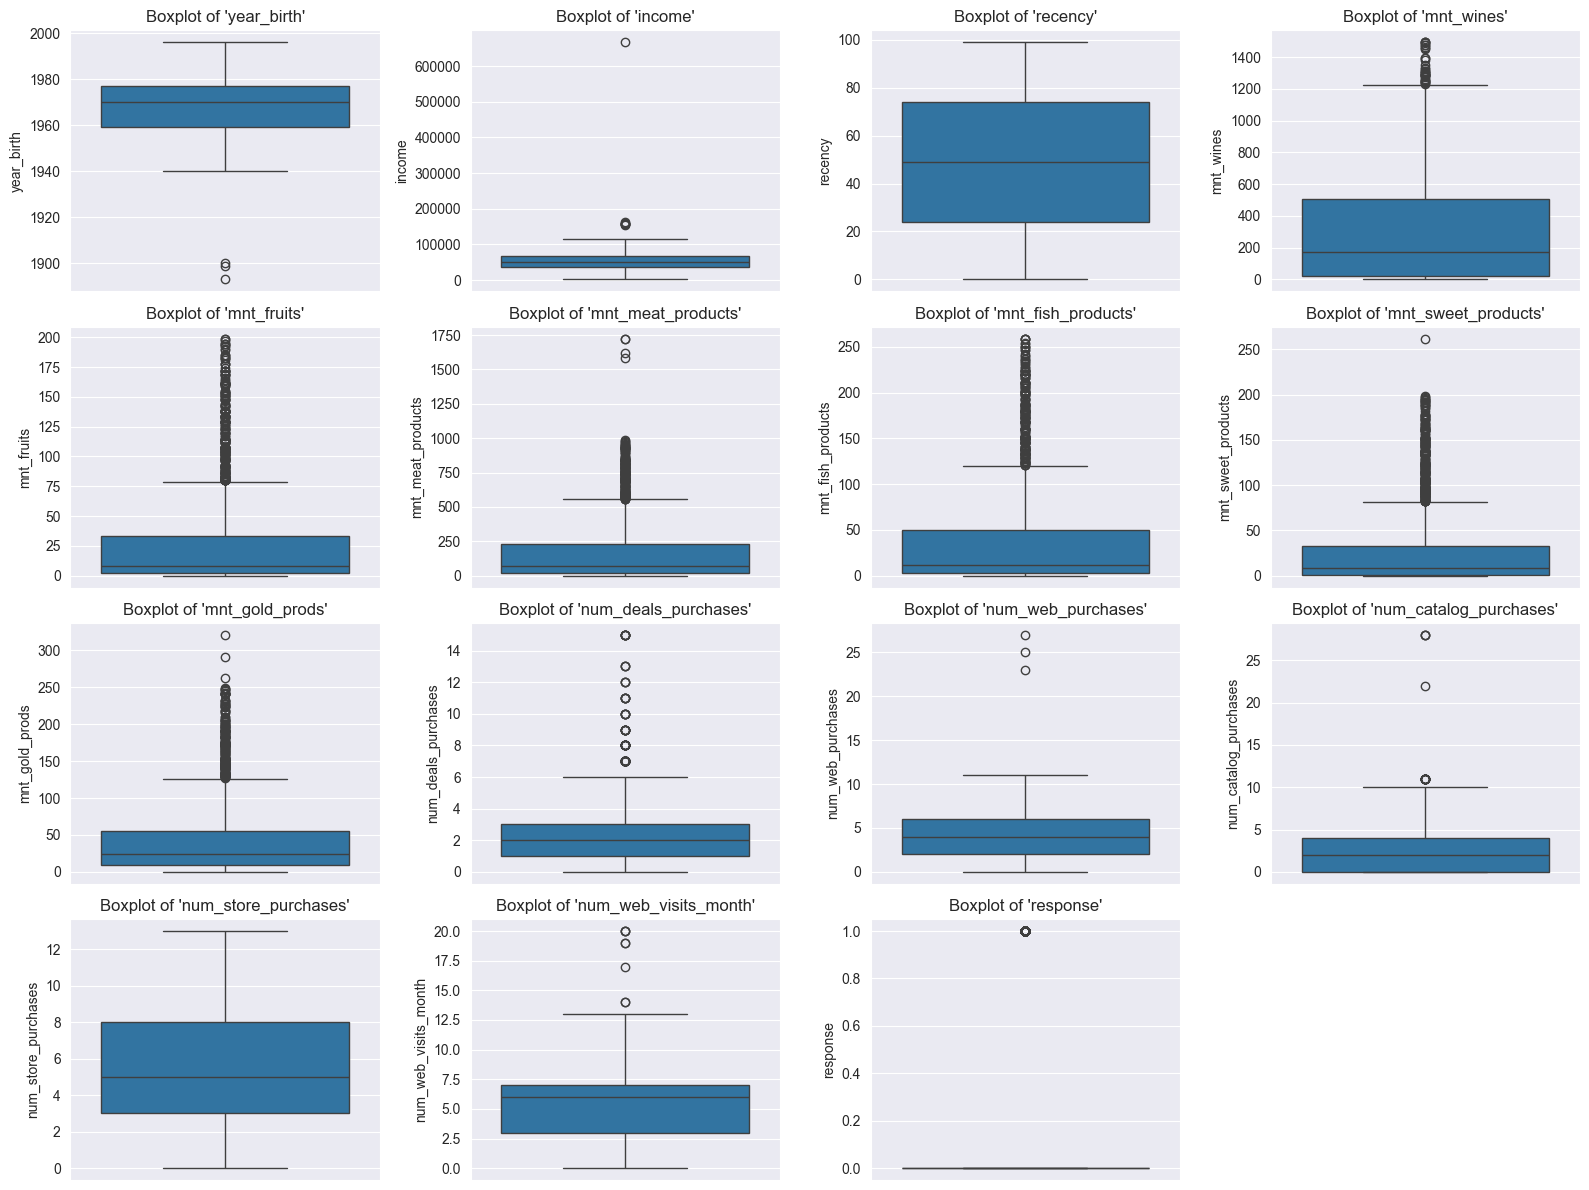

In [109]:
def create_boxplots(df, columns, rows=2, cols=2):
    fig, axes = plt.subplots(rows, cols, figsize=(rows*4, cols*3))
    axes = axes.flatten()  # Flatten to easily index in a loop

    for i, column in enumerate(columns):
        sns.boxplot(data=df, y=column, ax=axes[i])
        axes[i].set_title(f"Boxplot of '{column}'")

    # Remove any empty subplots if there are fewer columns than grid spaces
    for j in range(i + 1, rows * cols):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

create_boxplots(df, numerical_features, rows=4, cols=4)

Looking at age and income, we can see age seems to be some data input limits. For income we also have some outliers that we could look at removing to let the models generalise better.

`todo:` motivate why we dont remove outliers from other classes

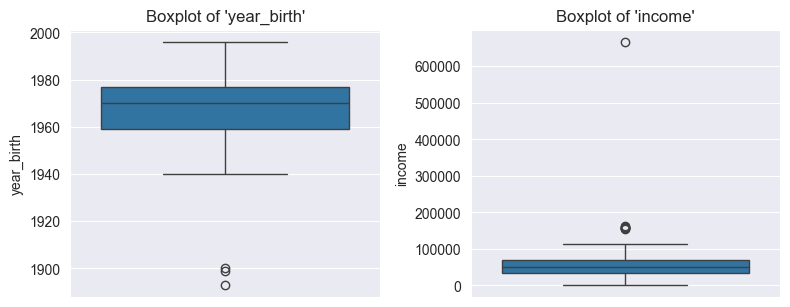

In [110]:
create_boxplots(df, ['year_birth', 'income'])

# Removing outliers
We would like to remove extremely poor or extremely rich customers from the data. 
Also we would like to remove extremely old and young people from the data. These would not help to give representable results downstream

In [111]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define the lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter the dataframe to only include values within the bounds
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

print("Number of rows before removing outliers:", df.shape[0])
df = remove_outliers(df, 'income')
df = remove_outliers(df, 'year_birth')
print("Number of rows after removing outliers:", df.shape[0])

Number of rows before removing outliers: 2216
Number of rows after removing outliers: 2205


### Feature Engineering

Lets add some extra information based on the dataset. 

In [112]:
df

id  year_birth   education marital_status   income  kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      teenhome dt_customer  recency  mnt_wines  mnt_fruits  mnt_meat_products  \
0            0  2012-09-04       58        635          88                546   
1            1  2014-03-08       38         11           1                  6   
2            0  2013-08-21       26        426          49                127   
3            0  2014-02-10       26         11           4                 20   
4            0  2014-01-19       94        173          43                118   
...        ...         ...      ...        ...         ...                ...   
2235         1  2013-06-13       46        709          43                182   
2236         1  2014-06-10       56        406           0                 30   
2237         0  2014-01-25       91        908          48                217   
2238         1  2014-01-24        8        428          30                214   
2239         1  2012-10-15       40         84           3                 61   

      mnt_fish_products  mnt_sweet_products  mnt_gold_prods  \
0                   172                  88              88   
1                     2                   1               6   
2                   111                  21              42   
3                    10                   3               5   
4                    46                  27              15   
...                 ...                 ...             ...   
2235                 42                 118             247   
2236                  0                   0               8   
2237                 32                  12              24   
2238                 80                  30              61   
2239                  2                   1              21   

      num_deals_purchases  num_web_purchases  num_catalog_purchases  \
0                       3                  8                     10   
1                       2                  1                      1   
2                       1                  8                      2   
3                       2                  2                      0   
4                       5                  5                      3   
...                   ...                ...                    ...   
2235                    2                  9                      3   
2236                    7                  8                      2   
2237                    1                  2                      3   
2238                    2                  6                      5   
2239                    3                  3                      1   

      num_store_purchases  num_web_visits_month  accepted_cmp3  accepted_cmp4  \
0                       4                     7              0              0   
1                       2                     5              0              0   
2                      10                     4              0              0   
3                       4                     6              0              0   
4                       6                     5              0              0   
...                   ...                   ...            ...            .

### Add the column months as customer
How many months a customer has been a customer is represented by the months_as_customer columns

In [113]:
# Add a new column age to the dataset
df['age'] = DATA_YEAR.year - df['year_birth']

df['dt_customer'] = pd.to_datetime(df['dt_customer'], format='%Y-%m-%d')
df['months_as_customer'] = 0
for index, row in df.iterrows():
   months_as_customer = round((DATA_YEAR - row['dt_customer']).days/30)
   df.at[index, "months_as_customer"] = months_as_customer

In [114]:
# TODO: Motivate the need for the following columns

# Add a new column to calculate the total amount spent by each customer for every product
df['total_spend'] = df['mnt_wines'] + df['mnt_fruits'] + df['mnt_meat_products'] + df['mnt_fish_products'] + df['mnt_sweet_products'] + df['mnt_gold_prods']

# Add a new column to calculate the total purchases made by each customer
df['total_purchases'] = df['num_deals_purchases'] + df['num_web_purchases'] + df['num_catalog_purchases'] + df['num_store_purchases']

# Add a new column to calculate the total number of campaign responses made by each customer
df['total_accepted_cpm'] = df['accepted_cmp1'] + df['accepted_cmp2'] + df['accepted_cmp3'] + df['accepted_cmp4'] + df['accepted_cmp5']

# Add a new column to check if the customer is a parent or not as a boolean
df['is_parent'] = ((df['kidhome'] > 0) | (df['teenhome'] > 0)).astype(int)

# Add a new column to split the marital status 
couple_status_mapping = {
    'Married': 1,
    'Together': 1,
    'Single': 0,
    'Divorced': 0,
    'Widow': 0,
    'Alone': 0,
    'Absurd': 0,
    'YOLO': 0
}
df['is_couple'] = df['marital_status'].map(couple_status_mapping)

# Create dummy variables for the 'education' column
education_dummies = pd.get_dummies(df['education'].str.lower(), prefix='education', dtype=int, drop_first=True)
df = pd.concat([df, education_dummies], axis=1)

df.head()

id  year_birth   education marital_status   income  kidhome  teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  dt_customer  recency  mnt_wines  mnt_fruits  mnt_meat_products  \
0  2012-09-04       58        635          88                546   
1  2014-03-08       38         11           1                  6   
2  2013-08-21       26        426          49                127   
3  2014-02-10       26         11           4                 20   
4  2014-01-19       94        173          43                118   

   mnt_fish_products  mnt_sweet_products  mnt_gold_prods  num_deals_purchases  \
0                172                  88              88                    3   
1                  2                   1               6                    2   
2                111                  21              42                    1   
3                 10                   3               5                    2   
4                 46                  27              15                    5   

   num_web_purchases  num_catalog_purchases  num_store_purchases  \
0                  8                     10                    4   
1                  1                      1                    2   
2                  8                      2                   10   
3                  2                      0                    4   
4                  5                      3                    6   

   num_web_visits_month  accepted_cmp3  accepted_cmp4  accepted_cmp5  \
0                     7              0              0              0   
1                     5              0              0              0   
2                     4              0              0              0   
3                     6              0              0              0   
4                     5              0              0              0   

   accepted_cmp1  accepted_cmp2  complain  response  age  months_as_customer  \
0              0              0         0         1   58                  28   
1              0              0         0         0   61                  10   
2              0              0         0         0   50                  17   
3              0              0         0         0   31                  11   
4              0              0         0         0   34                  12   

   total_spend  total_purchases  total_accepted_cpm  is_parent  is_couple  \
0         1617               25                   0          0          0   
1           27                6                   0          1          0   
2          776               21                   0          0          1   
3           53                8                   0          1          1   
4          422               19                   0          1          1   

   education_basic  education_graduation  education_master  education_phd  
0                0                     1                 0              0  
1                0                     1                 0              0  
2                0                     1                 0              0  
3                0                     1                 0              0  
4                0                     0                 0              1

Below we can now drop the redundant features because we transformed these variables into new variables:

In [115]:
df = df.drop(columns=['id', 'education', 'marital_status', 'year_birth', 'dt_customer'])

Now, checking the correlation:

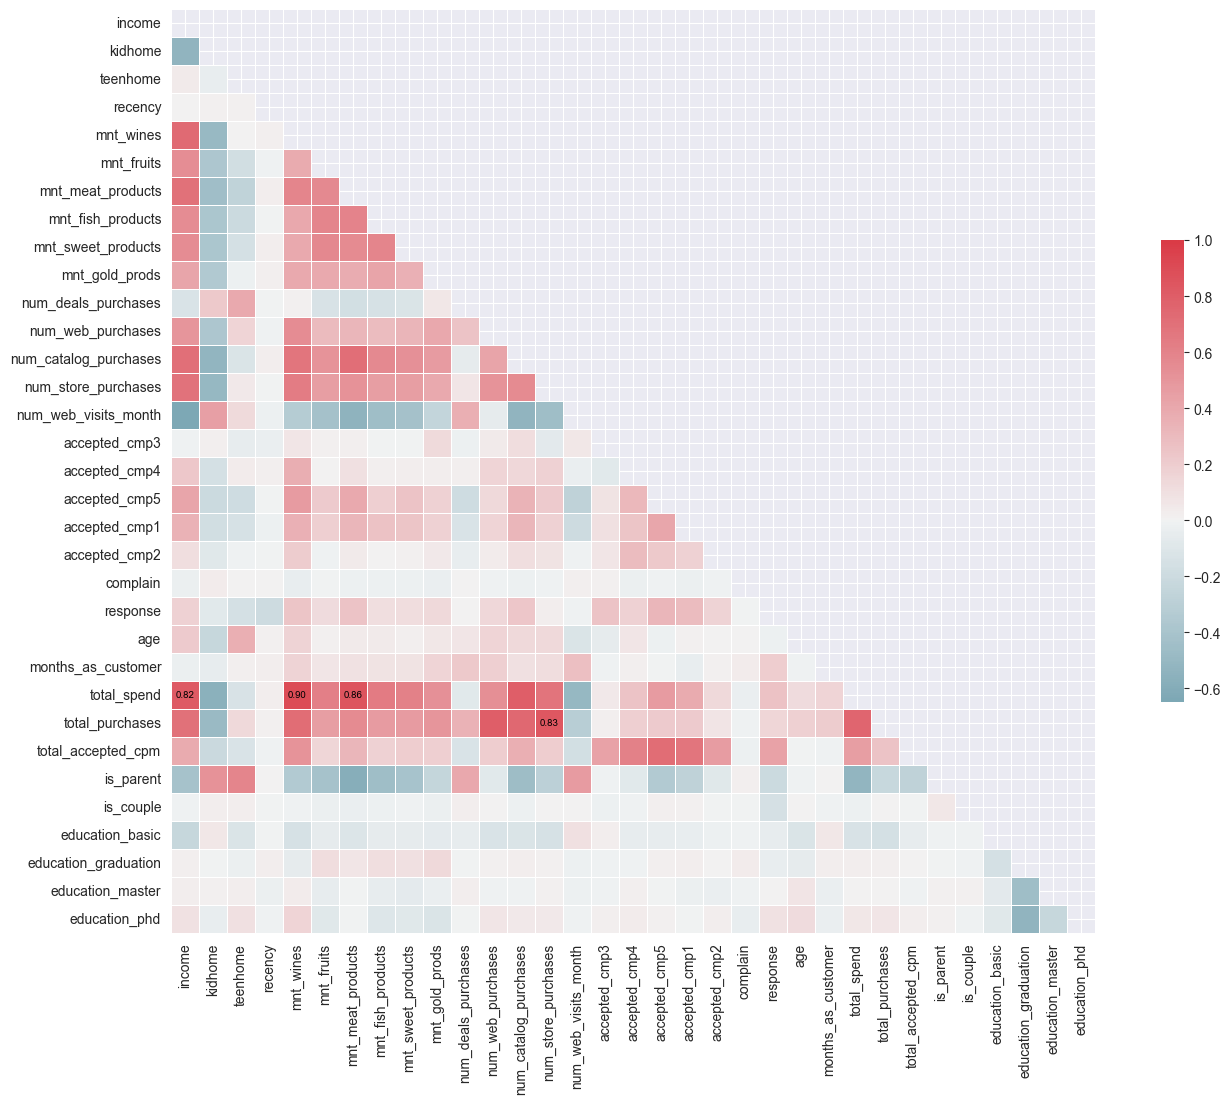

In [116]:
# Calculate corr
corr = df.corr()
# Mask for upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Set up the matplotlib figure
plt.figure(figsize=(17, 12))

# Create an annotation matrix with conditions for values above 0.8 or below -0.8
annot = corr.applymap(lambda x: f"{x:.2f}" if abs(x) >= 0.8 else "")

# Draw the heatmap with the mask, annotations, and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=sns.diverging_palette(220, 10, as_cmap=True), vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=annot, fmt="", annot_kws={"size": 7, "color": "black"})

plt.show()

`todo:` Resolve highly correlated variables found above

We can look at our target variable standalone.

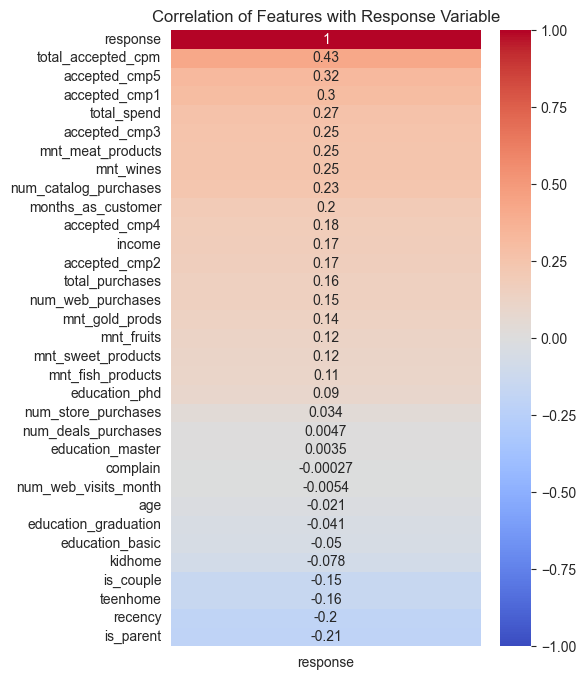

In [117]:
plt.figure(figsize=(5, 8))
sns.heatmap(corr[['response']].sort_values(by='response', ascending=False), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation of Features with Response Variable')
plt.show()

`todo:` Interpret

### Normalization and scaling step 


**WORK IN PROGRESS**

`todo:` Normalize/Standardize the data, explain what is going on

In [118]:
# Update to the numerical features
numerical_features = ['income', 'recency', 'mnt_wines', 'mnt_fruits', 'mnt_meat_products', 'mnt_fish_products', 
                               'mnt_sweet_products', 'mnt_gold_prods', 'num_deals_purchases', 'num_web_purchases', 
                               'num_catalog_purchases', 'num_store_purchases', 'num_web_visits_month', 'age', 
                               'months_as_customer', 'total_spend', 'total_purchases']

# Apply log transformation to specified features (that are right-skewed)
log_features = ['income', 'mnt_wines', 'mnt_fruits', 'mnt_meat_products', 'mnt_fish_products', 
                'mnt_sweet_products', 'mnt_gold_prods', 'num_deals_purchases', 'num_web_purchases', 
                'num_catalog_purchases', 'total_spend']

numerical_features_no_log = [feature for feature in numerical_features if feature not in log_features]

df[log_features] = df[log_features].apply(lambda x: np.log1p(x))

# Initialise the scaler
scaler = MinMaxScaler()

# Apply the scaler to the numerical features
df_normalized = df.copy()
# TODO: check if we need to use only the numerical features that were not log transformed?
df_normalized[numerical_features_no_log] = scaler.fit_transform(df[numerical_features_no_log])

df_normalized.head()

income  kidhome  teenhome   recency  mnt_wines  mnt_fruits  \
0  10.970592        0         0  0.585859   6.455199    4.488636   
1  10.743869        1         1  0.383838   2.484907    0.693147   
2  11.179046        0         0  0.262626   6.056784    3.912023   
3  10.190432        1         0  0.262626   2.484907    1.609438   
4  10.973254        1         0  0.949495   5.159055    3.784190   

   mnt_meat_products  mnt_fish_products  mnt_sweet_products  mnt_gold_prods  \
0           6.304449           5.153292            4.488636        4.488636   
1           1.945910           1.098612            0.693147        1.945910   
2           4.852030           4.718499            3.091042        3.761200   
3           3.044522           2.397895            1.386294        1.791759   
4           4.779123           3.850148            3.332205        2.772589   

   num_deals_purchases  num_web_purchases  num_catalog_purchases  \
0             1.386294           2.197225               2.397895   
1             1.098612           0.693147               0.693147   
2             0.693147           2.197225               1.098612   
3             1.098612           1.098612               0.000000   
4             1.791759           1.791759               1.386294   

   num_store_purchases  num_web_visits_month  accepted_cmp3  accepted_cmp4  \
0             0.307692                  0.35              0              0   
1             0.153846                  0.25              0              0   
2             0.769231                  0.20              0              0   
3             0.307692                  0.30              0              0   
4             0.461538                  0.25              0              0   

   accepted_cmp5  accepted_cmp1  accepted_cmp2  complain  response       age  \
0              0              0              0         0         1  0.696429   
1              0              0              0         0         0  0.750000   
2              0              0              0         0         0  0.553571   
3              0              0              0         0         0  0.214286   
4              0              0              0         0         0  0.267857   

   months_as_customer  total_spend  total_purchases  total_accepted_cpm  \
0            0.916667     7.388946         0.581395                   0   
1            0.166667     3.332205         0.139535                   0   
2            0.458333     6.655440         0.488372                   0   
3            0.208333     3.988984         0.186047                   0   
4            0.250000     6.047372         0.441860                   0   

   is_parent  is_couple  education_basic  education_graduation  \
0          0          0                0                     1   
1          1          0                0                     1   
2          0          1                0                     1   
3          1          1                0                     1   
4          1          1                0                     0   

   education_master  education_phd  
0                 0              0  
1                 0              0  
2                 0              0  
3                 0              0  
4                 0              1

## `todo:` Clustering and Association rules mining

### K-Means Clustering

In [119]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

df_cluster = df_normalized.copy()
df_cluster = df_cluster.drop(columns=['response'])

def kmeans_clustering(dataframe, n):
    
    kmeans_arr = []
    silhouette_arr = []
    for n in list(range(2, n+1)):
        kmeans = KMeans(n_clusters=n, random_state = 0)
        km_clusters = kmeans.fit_predict(dataframe)
        kmeans_arr.append(km_clusters)
        silhouette_arr.append(silhouette_score(dataframe, km_clusters))
    
    # Adding the k-means cluster labels to the dataframe
    dataframe['kmeans_cluster'] = kmeans_arr[-1]

    return dataframe, kmeans_arr, silhouette_arr

km_df, km_results, sil_scores = kmeans_clustering(df_cluster, 4)
print("Silhouette Scores", [float(num) for num in sil_scores], "\n")
km_df.head(10)

Silhouette Scores [0.3957353592908065, 0.2889809608755445, 0.23518503054501294] 



income  kidhome  teenhome   recency  mnt_wines  mnt_fruits  \
0  10.970592        0         0  0.585859   6.455199    4.488636   
1  10.743869        1         1  0.383838   2.484907    0.693147   
2  11.179046        0         0  0.262626   6.056784    3.912023   
3  10.190432        1         0  0.262626   2.484907    1.609438   
4  10.973254        1         0  0.949495   5.159055    3.784190   
5  11.043146        0         1  0.161616   6.255750    3.761200   
6  10.926586        0         1  0.343434   5.463832    4.189655   
7  10.417957        1         0  0.323232   4.343805    2.397895   
8  10.320618        1         0  0.191919   2.708050    0.000000   
9   8.639234        1         1  0.686869   3.367296    0.000000   

   mnt_meat_products  mnt_fish_products  mnt_sweet_products  mnt_gold_prods  \
0           6.304449           5.153292            4.488636        4.488636   
1           1.945910           1.098612            0.693147        1.945910   
2           4.852030           4.718499            3.091042        3.761200   
3           3.044522           2.397895            1.386294        1.791759   
4           4.779123           3.850148            3.332205        2.772589   
5           4.595120           0.000000            3.761200        2.708050   
6           5.105945           3.931826            3.912023        3.332205   
7           4.043051           1.386294            0.693147        3.178054   
8           3.218876           1.386294            1.386294        1.098612   
9           1.945910           0.693147            0.693147        2.639057   

   num_deals_purchases  num_web_purchases  num_catalog_purchases  \
0             1.386294           2.197225               2.397895   
1             1.098612           0.693147               0.693147   
2             0.693147           2.197225               1.098612   
3             1.098612           1.098612               0.000000   
4             1.791759           1.791759               1.386294   
5             1.098612           1.945910               1.609438   
6             1.609438           2.079442               1.386294   
7             1.098612           1.609438               0.000000   
8             0.693147           1.386294               0.000000   
9             0.693147           0.693147               0.000000   

   num_store_purchases  num_web_visits_month  accepted_cmp3  accepted_cmp4  \
0             0.307692                  0.35              0              0   
1             0.153846                  0.25              0              0   
2             0.769231                  0.20              0              0   
3             0.307692                  0.30              0              0   
4             0.461538                  0.25              0              0   
5             0.769231                  0.30              0              0   
6             0.538462                  0.30              0              0   
7             0.307692                  0.40              0              0   
8             0.153846                  0.45              0              0   
9             0.000000                  1.00              1              0   

   accepted_cmp5  accepted_cmp1  accepted_cmp2  complain       age  \
0              0              0              0         0  0.696429   
1              0              0              0         0  0.750000   
2              0              0              0         0  0.553571   
3              0              0              0         0  0.214286   
4              0              0              0         0  0.267857   
5              0              0              0         0  0.517857   
6              0              0              0         0  0.446429   
7              0              0              0         0  0.196429   
8              0              0              0         0  0.392857   
9              0              0              0         0  0.821429   

   month

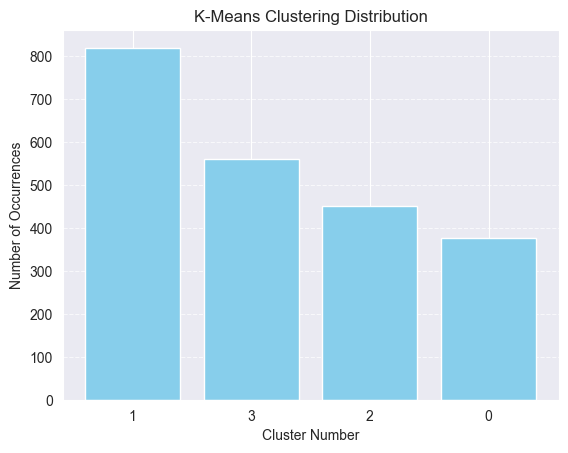

In [120]:
# Plotting K-Means clustering density plot
def plot_cluster_distribution(dataframe, column1, title1, xlab1):
    
    cluster_counts = dataframe[column1].value_counts()

    plt.bar(cluster_counts.index.astype(str), cluster_counts.values, color='skyblue')
    plt.title(title1)
    plt.xlabel(xlab1)
    plt.ylabel('Number of Occurrences')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
    
plot_cluster_distribution(km_df, 'kmeans_cluster', 'K-Means Clustering Distribution', 'Cluster Number')

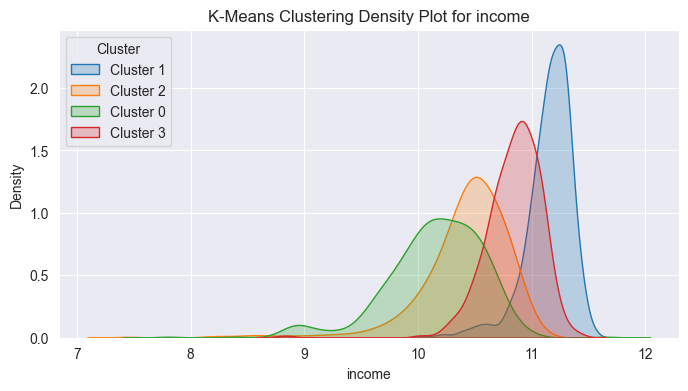

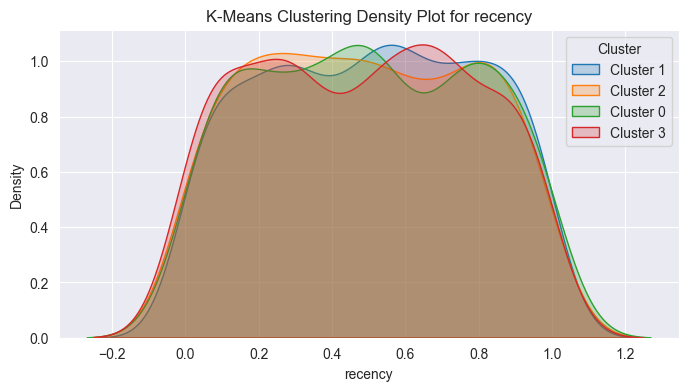

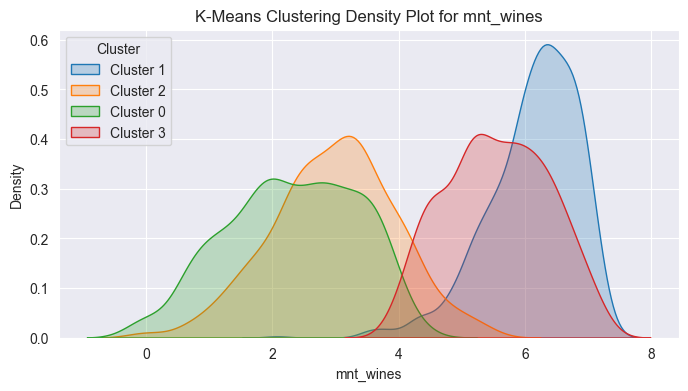

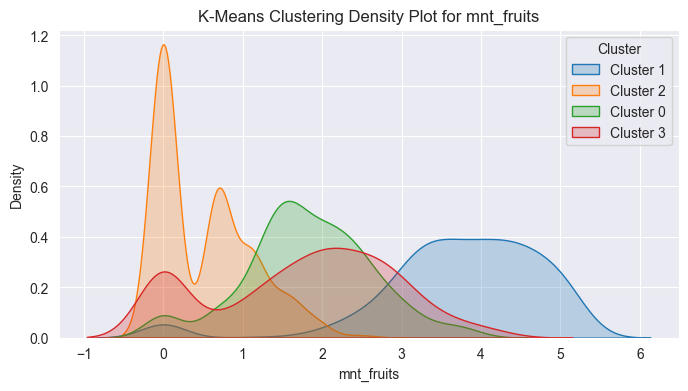

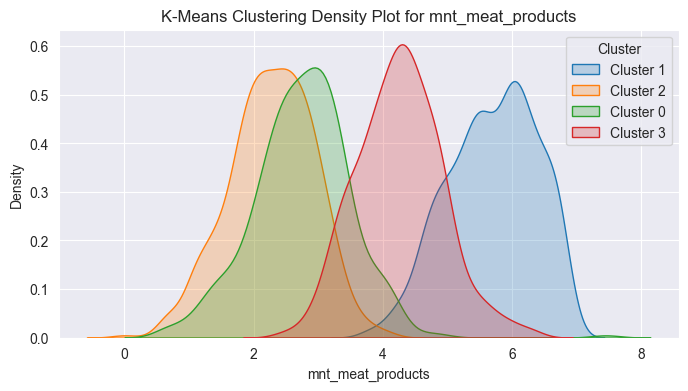

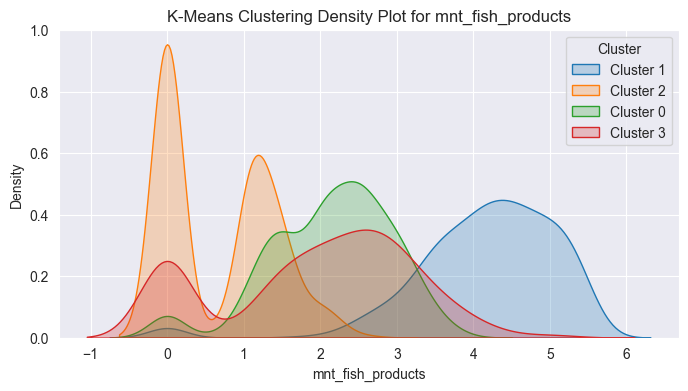

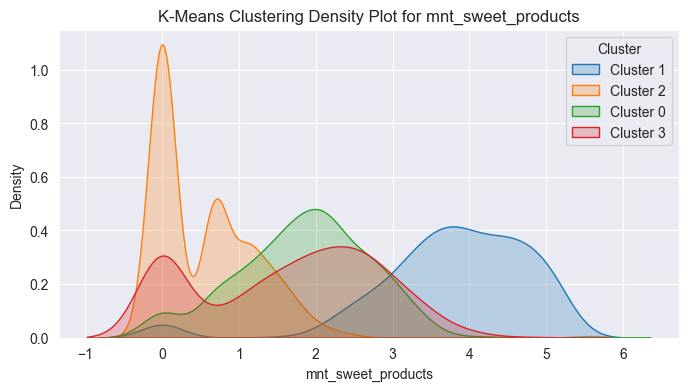

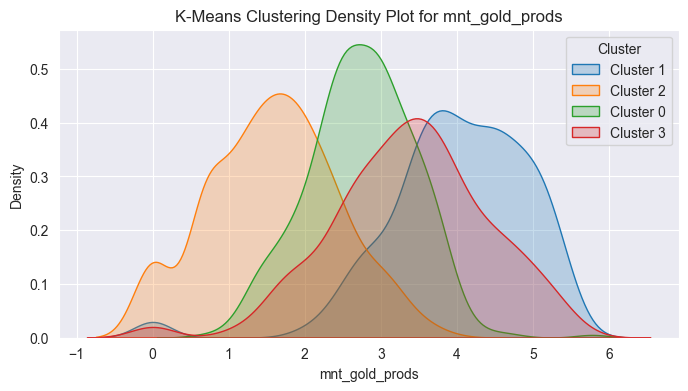

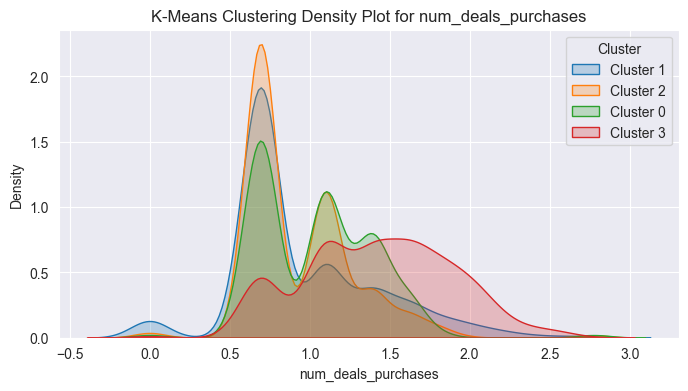

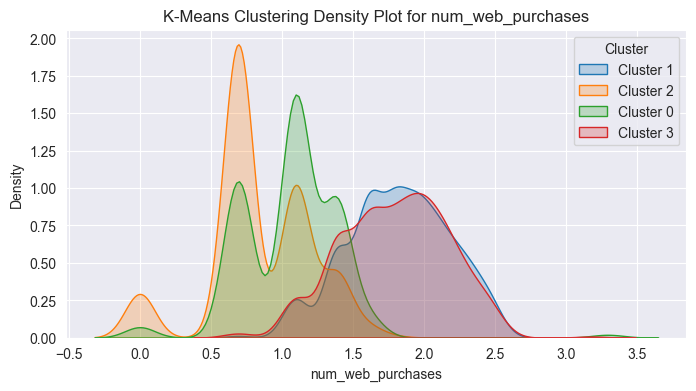

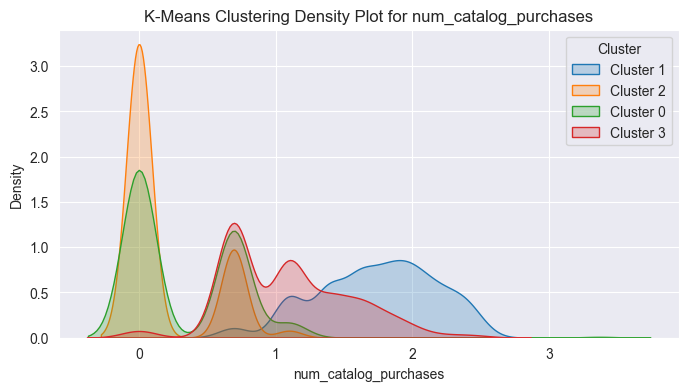

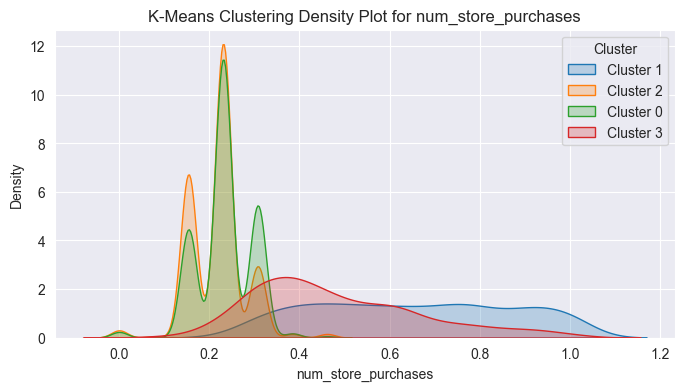

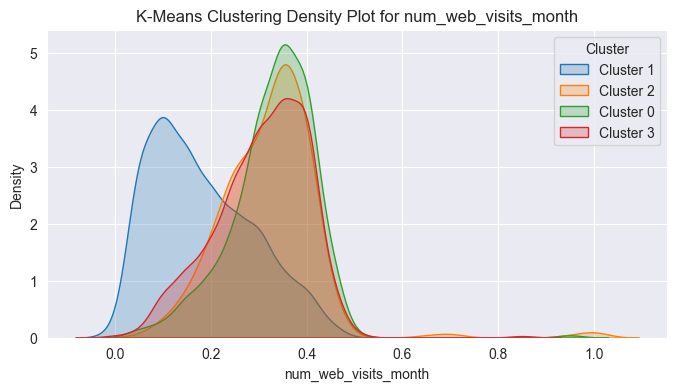

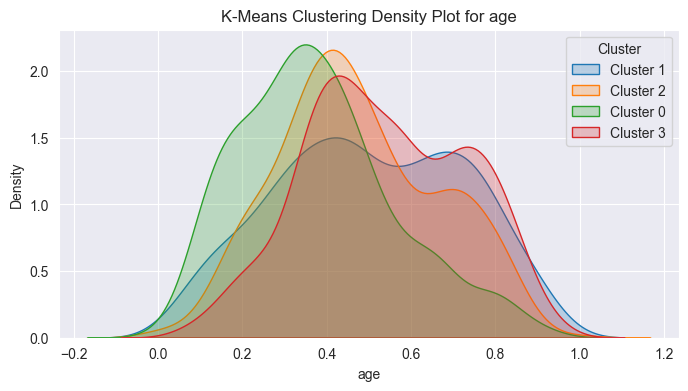

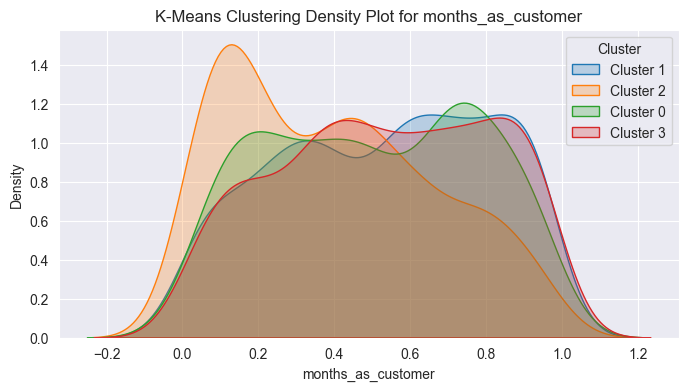

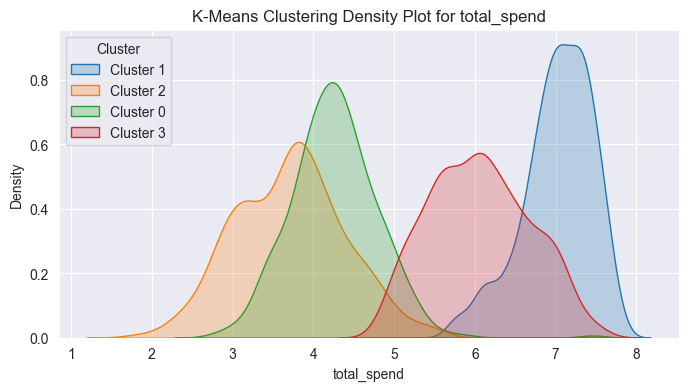

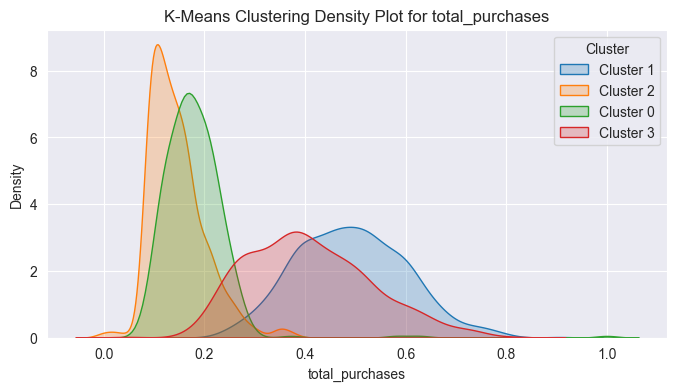

In [121]:
#Plot density plot for numerical features but with kmeans cluster color labels
def plot_kmeans_density(dataframe, cluster_column, title, col):
    
    plt.figure(figsize=(8, 4))
    for cluster in dataframe[cluster_column].unique():
        sns.kdeplot(data=dataframe[dataframe[cluster_column] == cluster], x=col, label=f'Cluster {cluster}', shade=True)
    
    plt.title(title)
    plt.xlabel(col)
    plt.legend(title='Cluster')
    
    plt.show()

for col in numerical_features:
    plot_kmeans_density(km_df, 'kmeans_cluster', f'K-Means Clustering Density Plot for {col}', col)

In the context of k-means, inertia is the sum of squared distances of samples to their closest cluster center (also known as centroid).

We can use the inertia values to determine the optimal number of clusters by identifying the elbow point in the inertia plot. The elbow point represents the optimal number of clusters where the inertia starts to decrease at a slower rate.

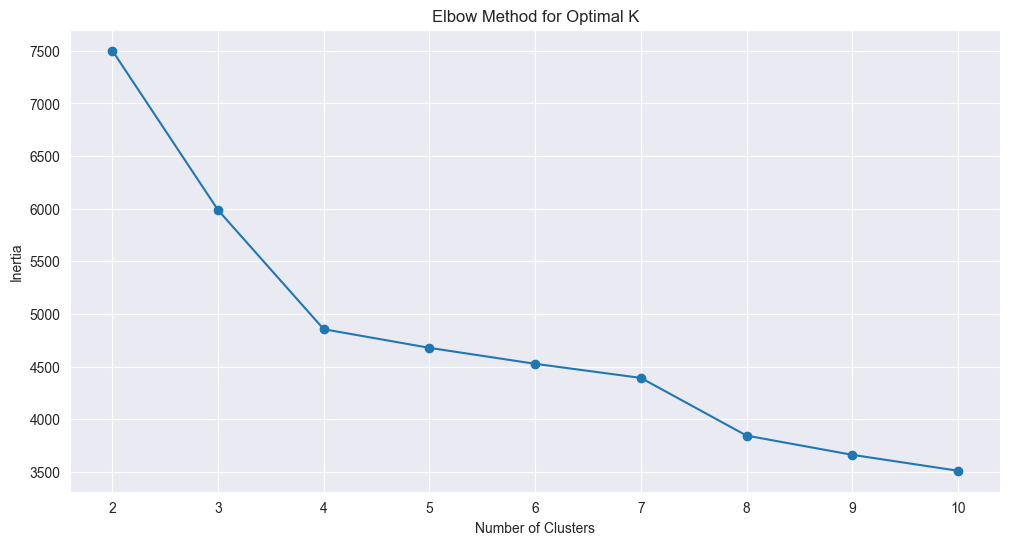

In [26]:
def compute_inertia_values(dataframe, cluster_range):
    
    inertias = []
    for k in cluster_range:
        kmeans = KMeans(n_clusters=k, random_state=0)
        kmeans.fit(dataframe)
        inertias.append(kmeans.inertia_)
        
    return inertias

cluster_range = range(2, 11)
km_inertia = compute_inertia_values(df_cluster, cluster_range)

def plot_elbow_method(cluster_range, inertias):
    
    plt.figure(figsize=(12, 6))
    plt.plot(cluster_range, inertias, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.title('Elbow Method for Optimal K')
    
    plt.show()
    
plot_elbow_method(cluster_range, km_inertia)

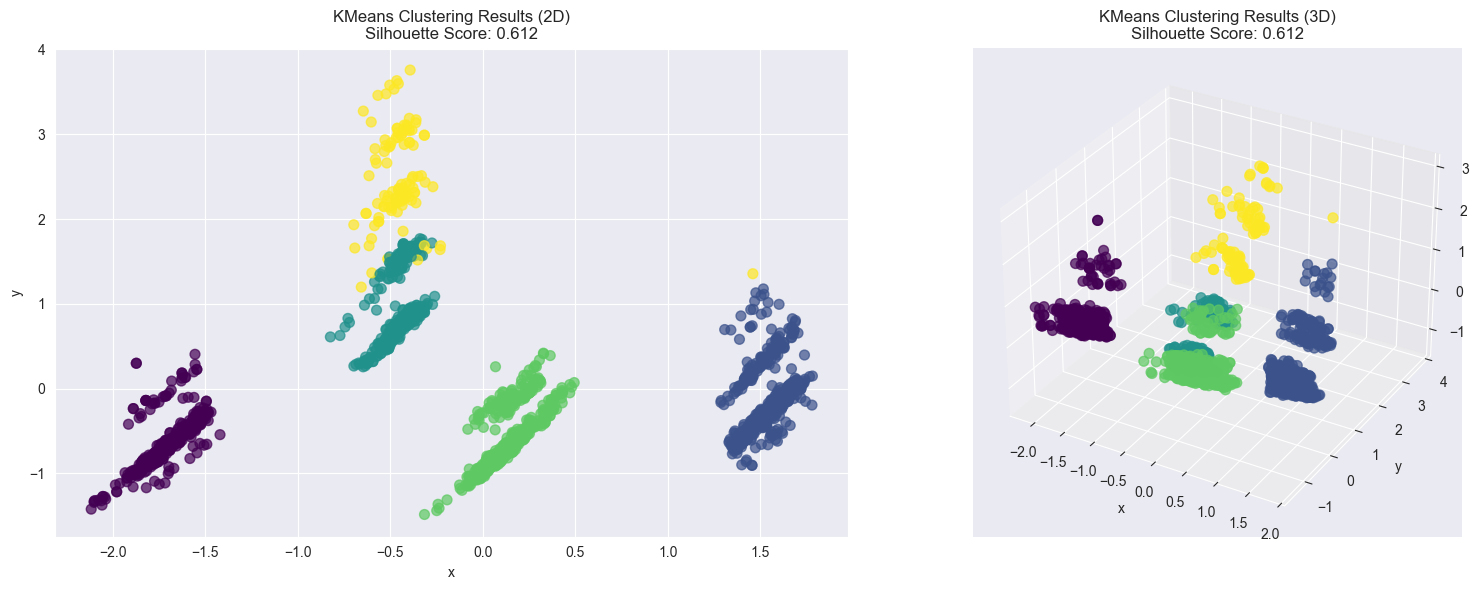

In [27]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Performing PCA for cluster visualization purposes
pca = PCA(n_components=3)
df_pca = pca.fit_transform(df_cluster)

def plot_kmeans(dataframe, optimal_k):
    
    fig = plt.figure(figsize=(24, 6))

    # Left plot: 2D Clustering Results
    kmeans = KMeans(n_clusters=optimal_k, random_state=0)
    kmeans.fit(dataframe)
    kmeans_results = kmeans.predict(dataframe)
    silhouette_score_value = silhouette_score(dataframe, kmeans_results)

    ax1 = fig.add_subplot(1, 3, 1)
    ax1.scatter(dataframe[:, 0], dataframe[:, 1], c=kmeans_results, cmap='viridis', s=50, alpha=0.7)
    ax1.set_xlabel('x')
    ax1.set_ylabel('y')
    ax1.set_title(f'KMeans Clustering Results (2D)\nSilhouette Score: {silhouette_score_value:.3f}')

    # Right plot: 3D Clustering Results
    ax2 = fig.add_subplot(1, 3, 2, projection='3d')
    ax2.scatter(dataframe[:, 0], dataframe[:, 1], dataframe[:, 2], c=kmeans_results, cmap='viridis', s=50, alpha=0.7)
    ax2.set_xlabel('x')
    ax2.set_ylabel('y')
    ax2.set_zlabel('z')
    ax2.set_title(f'KMeans Clustering Results (3D)\nSilhouette Score: {silhouette_score_value:.3f}')

    plt.tight_layout()
    plt.show()

# After looking at the elbow method, 4 represents the optimal number of clusters
plot_kmeans(df_pca, 5)

### Hierarchical Clustering
TODO Justify why single linkage is used

In [28]:
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.cluster.hierarchy import cut_tree

def perform_clustering(data, method='single', dist_threshold=0.0):
    
    Z_linkage = linkage(data, method=method) 

    clusters = cut_tree(Z_linkage, height=dist_threshold).flatten()
    num_clusters = len(np.unique(clusters))
    print(f"Number of unique clusters formed: {num_clusters}")

    return Z_linkage, clusters
    
# Currently using the distance threshold of 0
Z, clusters = perform_clustering(df_normalized)

Number of unique clusters formed: 2205


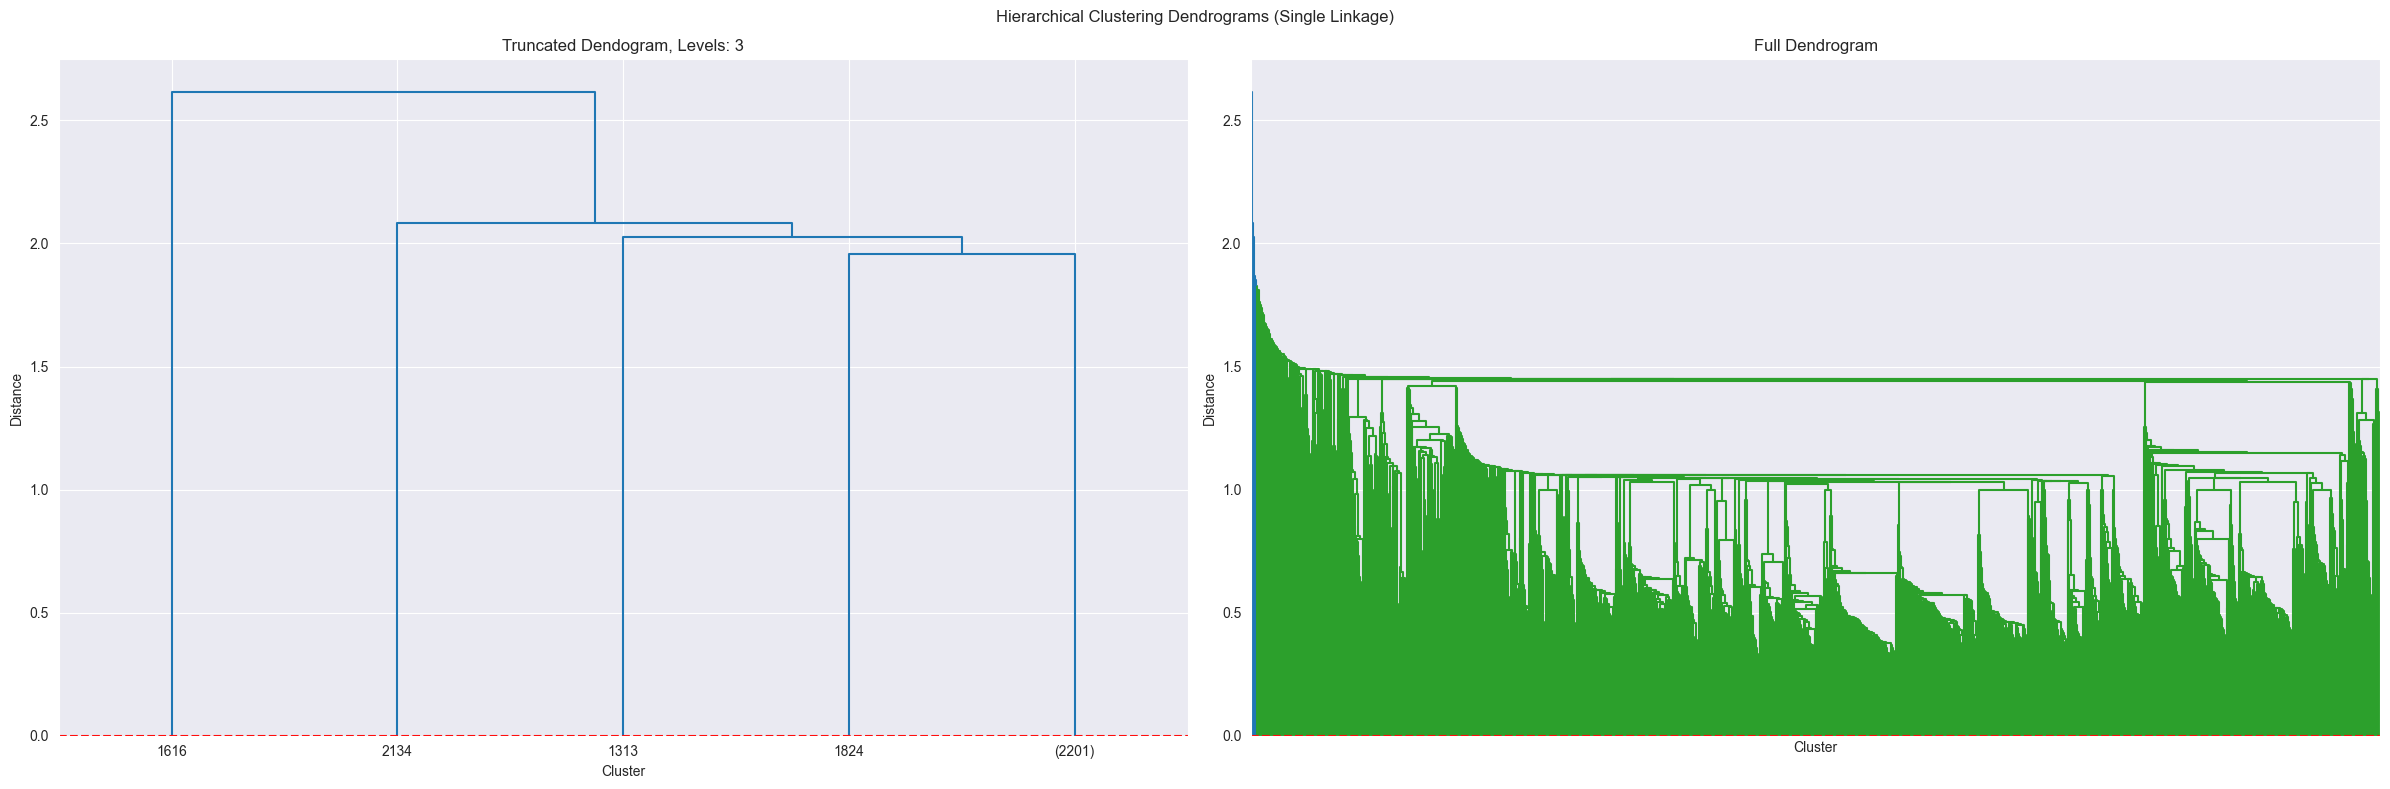

In [29]:
def plot_dendrogram(Z, clusters, distance_threshold=0.0, levels=3):

    fig = plt.figure(figsize=(24, 8))

    # Plotting the truncated dendrogram
    ax1 = fig.add_subplot(1, 2, 1)
    dendrogram(Z, 
               truncate_mode='level',  
               p=levels,                    
               labels=clusters,        
               leaf_rotation=0,        
               leaf_font_size=10,      
               ax=ax1)              
    ax1.axhline(y=distance_threshold, color='r', linestyle='--')
    ax1.set_title(f'Truncated Dendogram, Levels: {levels}')
    ax1.set_xlabel("Cluster")
    ax1.set_ylabel("Distance")

    # Plotting the full dendrogram 
    ax2 = fig.add_subplot(1, 2, 2)
    dendrogram(Z, 
               truncate_mode=None,  
               labels=clusters,     
               leaf_rotation=0,     
               leaf_font_size=10,   
               ax=ax2,           
               show_leaf_counts=False)  
    ax2.axhline(y=distance_threshold, color='r', linestyle='--')
    ax2.set_title("Full Dendrogram")
    ax2.set_xlabel("Cluster")  
    ax2.set_ylabel("Distance")
    ax2.set_xticks([])

    plt.suptitle("Hierarchical Clustering Dendrograms (Single Linkage)")
    plt.tight_layout()
    plt.show()

plot_dendrogram(Z, clusters, 0, 3)

Finding the optimal threshold requires identifying the largest gap between consecutive distances in the dendrogram.



In [30]:
def find_best_threshold(Z):
    
    # Calculating the distances between clusters, and then finding the largest gap between consecutive distances
    distances = Z[:, 2] 
    gap = np.diff(distances)
    opt_threshold = distances[np.argmax(gap)]
    
    return opt_threshold

optimal_threshold = find_best_threshold(Z)
print(f"Optimal distance threshold: {optimal_threshold:.2f}")

Optimal distance threshold: 2.08


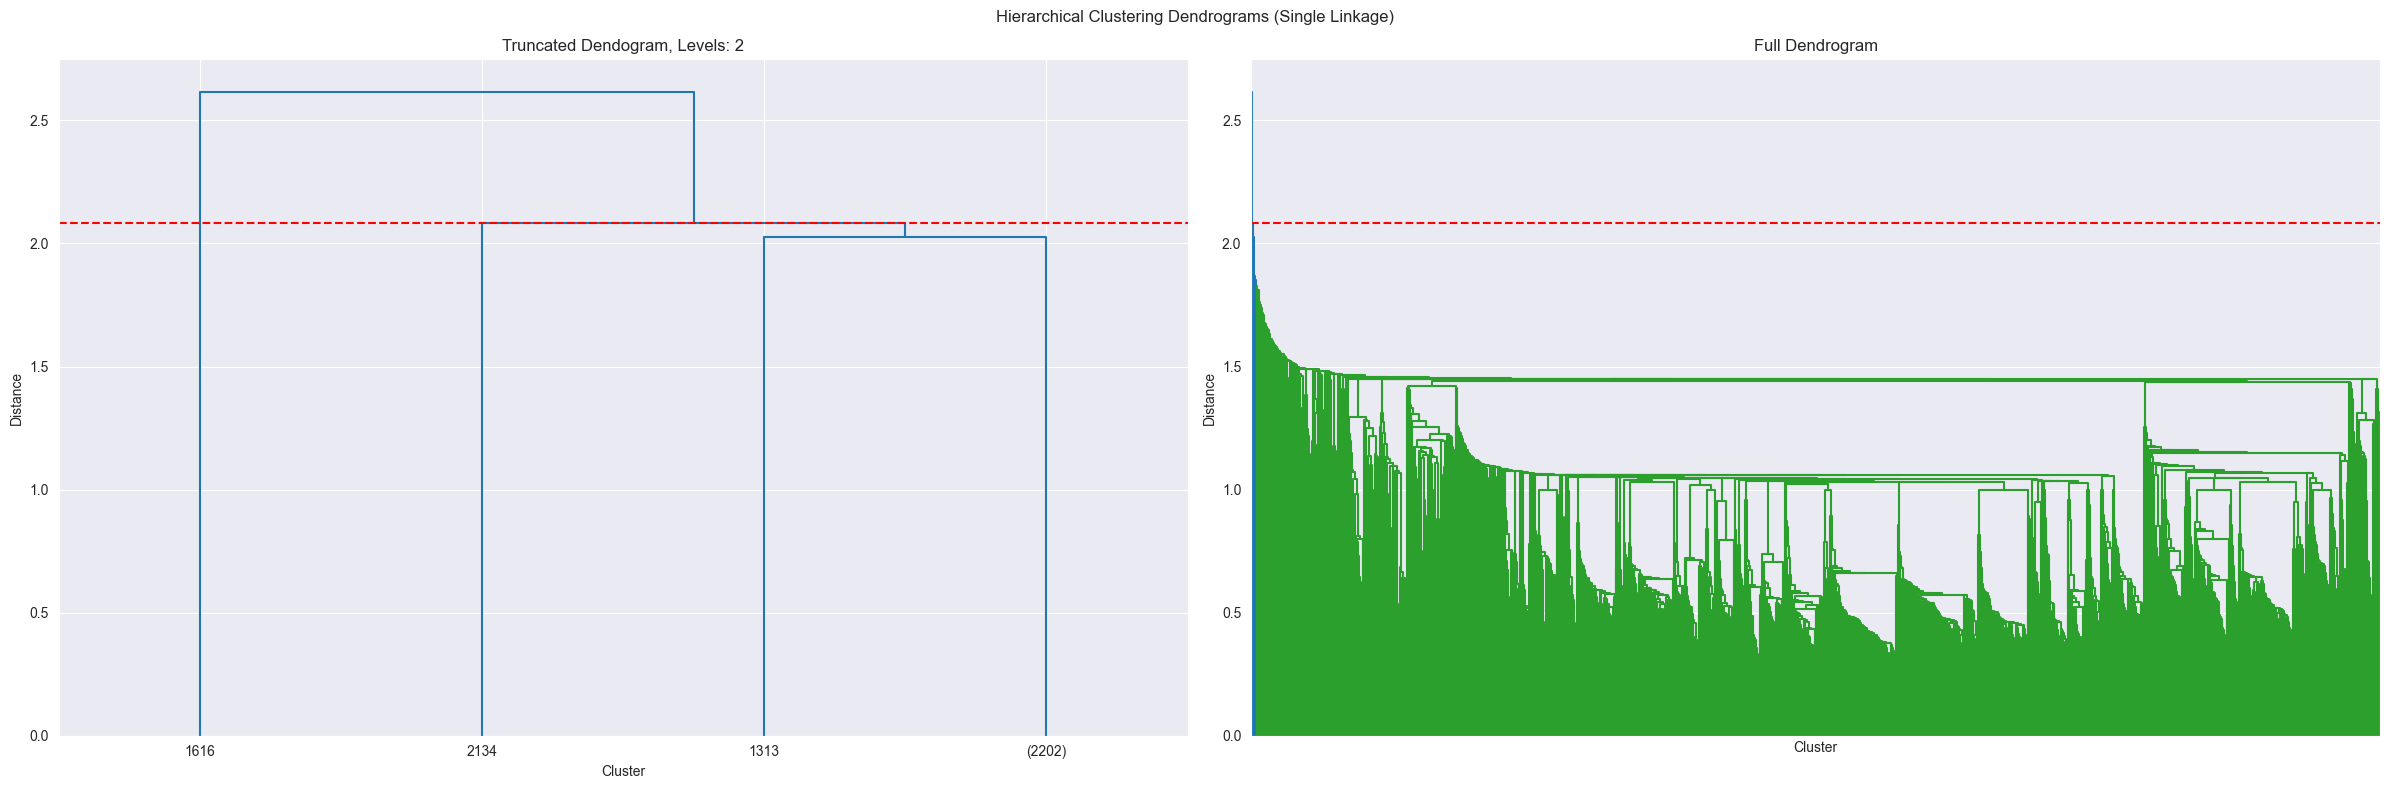

In [31]:
# Plotting the dendrogram with the optimal threshold
plot_dendrogram(Z, clusters, optimal_threshold, 2)


Number of unique clusters formed: 4
Optimal Distance Threshold: 2.084370909855814
Number of clusters formed: 4
Accuracy: 84.94%


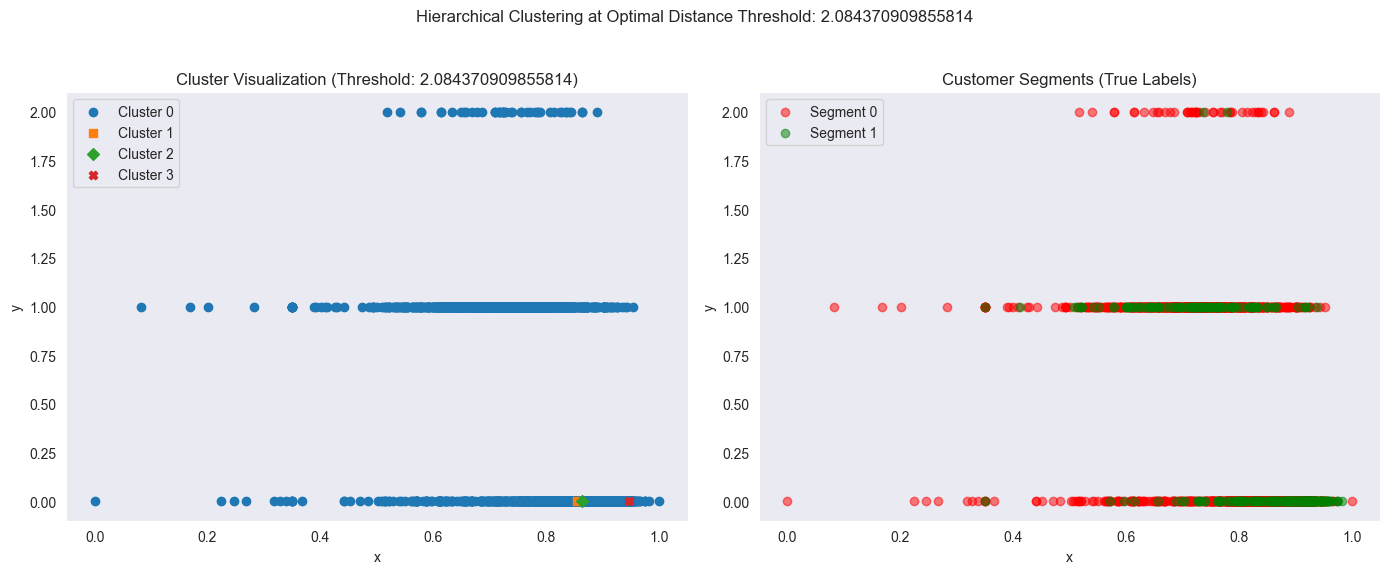

In [32]:
from sklearn.metrics import accuracy_score

def calculate_accuracy(predicted_labels, true_labels):
    return accuracy_score(true_labels, predicted_labels)

def plot_clusters_and_labels(data, clusters, true_labels, optimal_threshold, markers=None, colors=None):
    
    if markers is None:
        markers = ['o', 's', 'D', 'X']
    if colors is None:
        colors = ['r', 'g']
    
    num_clusters = len(np.unique(clusters))
    fig, axs = plt.subplots(1, 2, figsize=(14, 6))

    for cluster in range(num_clusters):
        cluster_points = data[clusters == cluster]
        axs[0].scatter(
            cluster_points[:, 0],
            cluster_points[:, 1],
            marker=markers[cluster % len(markers)],
            label=f'Cluster {cluster}'
        )

    axs[0].set_title(f'Cluster Visualization (Threshold: {optimal_threshold})')
    axs[0].set_xlabel('x')
    axs[0].set_ylabel('y')
    axs[0].legend()
    axs[0].grid()

    if true_labels is not None:
        unique_labels = np.unique(true_labels)
        for i, label in enumerate(unique_labels):
            label_points = data[true_labels == label]
            axs[1].scatter(
                label_points[:, 0],
                label_points[:, 1],
                label=f'Segment {label}',
                color=colors[i % len(colors)],
                alpha=0.5
            )

    axs[1].set_title('Customer Segments (True Labels)')
    axs[1].set_xlabel('x')
    axs[1].set_ylabel('y')
    axs[1].legend()
    axs[1].grid()

    plt.suptitle(f"Hierarchical Clustering at Optimal Distance Threshold: {optimal_threshold}")
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

def perform_clustering_and_plot(data, true_labels, optimal_threshold):
    Z, clusters,  = perform_clustering(data, 'single', optimal_threshold)
    num_clusters = len(np.unique(clusters))
    
    print(f"Optimal Distance Threshold: {optimal_threshold}")
    print(f"Number of clusters formed: {num_clusters}")
    accuracy = calculate_accuracy(clusters, true_labels)
    print(f'Accuracy: {accuracy * 100:.2f}%')
    
    plot_clusters_and_labels(data, clusters, true_labels, optimal_threshold)

true_labels = df_normalized['response']
perform_clustering_and_plot(df_cluster.to_numpy(), true_labels.to_numpy(), optimal_threshold)

In [33]:
df_normalized['response']

0       1
1       0
2       0
3       0
4       0
       ..
2235    0
2236    0
2237    0
2238    0
2239    1
Name: response, Length: 2205, dtype: int64

# Assocation rules

With association rules, frequent itemsets are found in the data. A frequent itemset, is a set of variables that has a high likelihood of being found together. An itemset is at least a two variables, but it can be much more. The likelihood of an itemset being found, is determined through the support support thresholds. There are two types of requirements or steps in assocation rules:
1. num_itemsets. How frequent a combination of an itemset to appear in the dataset, to be considered an itemset. This is important, because there might be an obsure itemset, with only a single instance that resulted in a purchase, so even though the likihood of purchase when seeing this itemset is 100%, the actual real world application is 0
- confidence of support threshold. This is the required confidence that an itemset must have to result in purchasing. So if variable A + B -> C. The support threshold determines how often the A + B, indeed was seen with a result in C. In other terms, if someone buys coffee(A) and sugar(B), in at least 80% of the cases he aslo buys coffee milk. the confidence in this scenario is threshold is set to 0.8. The assocation rule algorithm, only identifies the association rule, when the cofidence of the rule has at least the likelihood to occur in the data. 

Steps in the association rule Appropri dataset
1. Convert all variables that we would like to test for into a binary representation 

In [34]:
Q3 = np.quantile(df_normalized["recency"], 0.75)
np.quantile(df_normalized["recency"], 0.50)

np.float64(0.494949494949495)

In [53]:
def transform_df_into_interquartile_range_categories(df_to_transform):
    """
    it is assumed that the values in the df are already scaled, relating to its distribution.
    
    For each float column in columns_to_transform. They should become a dummy variable of the same column depending on where the cell is in the interquartile range of such a column
    
    For each float column in columns_to_transform, four new binary columns will be created 
    indicating which quartile range the value falls into:
    - '{col}_very_low': 1 if < Q1, else 0
    - '{col}_low': 1 if >= Q1 and < Q2, else 0
    - '{col}_high': 1 if >= Q2 and < Q3, else 0
    - '{col}_very_high': 1 if >= Q3, else 0
    
    :param df_to_transform: pandas DataFrame containing the columns to transform
    :return: transformed pandas DataFrame with new binary columns
    """
    df_local = df_to_transform.copy()
    
    columns_to_transform = ['income', 'recency', 'mnt_wines', 'mnt_fruits', 'mnt_meat_products', 'mnt_fish_products', 
                               'mnt_sweet_products', 'mnt_gold_prods', 'num_deals_purchases', 'num_web_purchases', 
                               'num_catalog_purchases', 'num_store_purchases', 'num_web_visits_month', 'age', 
                               'months_as_customer', 'total_spend', 'total_purchases']
    
    # For each column, calculate quartiles and create new binary columns
    for col in columns_to_transform:
        if col in df_local.columns:
            # Calculate quartiles
            q1 = df_local[col].quantile(0.25)
            q2 = df_local[col].quantile(0.50)  # median
            q3 = df_local[col].quantile(0.75)
            
            # Create four new binary columns for each quartile range
            df_local[f'{col}_very_low'] = (df_local[col] < q1).astype(int)
            df_local[f'{col}_low'] = ((df_local[col] >= q1) & (df_local[col] < q2)).astype(int)
            df_local[f'{col}_high'] = ((df_local[col] >= q2) & (df_local[col] < q3)).astype(int)
            df_local[f'{col}_very_high'] = (df_local[col] >= q3).astype(int)
            
            # Drop original numerical column
            df_local.drop(columns=[col], inplace=True)
    
    # create new dummy column, if multiple kids are at home using a onehot encoded variable
    df_local["multiplekidhome"] = df_local["kidhome"].apply(lambda x: 1 if x > 1 else 0)
    df_local["multipleteenhome"] = df_local["teenhome"].apply(lambda x: 1 if x > 1 else 0)
    
    # transforming kidhome and teenhome to be a binary column
    df_local["kidhome"] = df_local["kidhome"].apply(lambda x: 1 if x > 0 else 0)
    df_local["teenhome"] = df_local["teenhome"].apply(lambda x: 1 if x > 0 else 0)
    df_local = df_local.applymap(lambda x: 1 if x > 0 else 0)
    
    return df_local    
    

df_interquartile_transformed = transform_df_into_interquartile_range_categories(df_normalized)
df_interquartile_transformed

kidhome  teenhome  accepted_cmp3  accepted_cmp4  accepted_cmp5  \
0           0         0              0              0              0   
1           1         1              0              0              0   
2           0         0              0              0              0   
3           1         0              0              0              0   
4           1         0              0              0              0   
...       ...       ...            ...            ...            ...   
2235        0         1              0              0              0   
2236        1         1              0              0              0   
2237        0         0              0              1              0   
2238        0         1              0              0              0   
2239        1         1              0              0              0   

      accepted_cmp1  accepted_cmp2  complain  response  total_accepted_cpm  \
0                 0              0         0         1                   0   
1                 0              0         0         0                   0   
2                 0              0         0         0                   0   
3                 0              0         0         0                   0   
4                 0              0         0         0                   0   
...             ...            ...       ...       ...                 ...   
2235              0              0         0         0                   0   
2236              1              0         0         0                   1   
2237              0              0         0         0                   1   
2238              0              0         0         0                   0   
2239              0              0         0         1                   0   

      is_parent  is_couple  education_basic  education_graduation  \
0             0          0                0                     1   
1             1          0                0                     1   
2             0          1                0                     1   
3             1          1                0                     1   
4             1          1                0                     0   
...         ...        ...              ...                   ...   
2235          1          1                0                     1   
2236          1          1                0                     0   
2237          0          0                0                     1   
2238          1          1                0                     0   
2239          1          1                0                     0   

      education_master  education_phd  income_very_low  income_low  \
0                    0              0                0           0   
1                    0              0                0           1   
2                    0              0                0           0   
3                    0              0                1           0   
4                    0              1                0           0   
...                ...            ...              ...         ...   
2235                 0              0                0           0   
2236                 0              1                0           0   
2237                 0              0                0           0   
2238                 1              0                0           0   
2239                 0              1                0           0   

      income_high  income_very_high  recency_very_low  recency_low  \
0               1                 0                 0            0   
1               0                 0                 0            1   
2               0                 1                 0            1   
3               0                 0                 0            1   
4               1                 0                 0            0   
...           ...               ...               ...          ...   
2235            1                 0         

In [96]:
#Importing Libraries
from mlxtend.frequent_patterns import fpgrowth, association_rules
#running the fpgrowth algorithm
dataset = df_interquartile_transformed
item_sets = fpgrowth(dataset, min_support=0.05, use_colnames=True, max_len=7, verbose=False)
# printing top 10
item_sets

/Users/mehdigreefhorst/Desktop/DM/venv/lib/python3.12/site-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


KeyboardInterrupt: 

We are most interested in conversion of a customer into a response. therefore we want to find the association rules with the variables and response

In [95]:
for index, item in item_sets.iterrows():
    for val in item["itemsets"]:
        if "response" in val:
            print("itemset nr = ", index)
            print("itemset = ",item["itemsets"])
            print("support itemset = ", item["support"])
            print()
            

itemset nr =  18
itemset =  frozenset({'response'})
support itemset =  0.1510204081632653

itemset nr =  3243
itemset =  frozenset({'response', 'num_catalog_purchases_very_high'})
support itemset =  0.07936507936507936

itemset nr =  3244
itemset =  frozenset({'response', 'total_spend_very_high'})
support itemset =  0.07573696145124717

itemset nr =  3245
itemset =  frozenset({'response', 'mnt_meat_products_very_high'})
support itemset =  0.06938775510204082

itemset nr =  3246
itemset =  frozenset({'response', 'months_as_customer_very_high'})
support itemset =  0.06893424036281179

itemset nr =  3247
itemset =  frozenset({'response', 'education_graduation'})
support itemset =  0.06893424036281179

itemset nr =  3248
itemset =  frozenset({'response', 'mnt_wines_very_high'})
support itemset =  0.06757369614512472

itemset nr =  3249
itemset =  frozenset({'response', 'num_web_visits_month_very_high'})
support itemset =  0.05986394557823129

itemset nr =  3250
itemset =  frozenset({'num_w

In [ ]:
# Generate association rules with a minimum confidence level
rules = association_rules(item_sets, metric="confidence", min_threshold=0.5, num_itemsets=len(item_sets))

rules

In [ ]:
# Order the most frequent item combinations in the entire dataset, by sorting the dataset by support, confidence, and lift
rules_10 = rules.sort_values(["support", "confidence","lift"],axis = 0, ascending = False).head(10)
rules_10

In [ ]:
# Create a bar plot for confidence values
plt.figure(figsize=(10, 6))
sns.barplot(x='confidence', y='antecedents', hue='consequents', data=rules, palette='viridis')

# Add title and labels
plt.title('Confidence of Association Rules', fontsize=14)
plt.xlabel('Confidence', fontsize=12)
plt.ylabel('Antecedents', fontsize=12)
plt.legend(title='Consequents', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.tight_layout()
plt.show()


In [ ]:
#### Visualization of obtained rules
plt.figure(figsize=(15, 6))
sns.barplot(x="support", y="confidence", data=rules, palette='viridis')
plt.title("support vs confidence")
plt.show()

plt.figure(figsize=(15, 6))
plt.scatter(rules_10['support'], rules_10['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()


In [ ]:
# Write your code for Association rules with 15% Support and 30% confidence
rules = association_rules(item_sets, metric='confidence', min_threshold=0.30,
                          num_itemsets=len(item_sets))
rules.head()

# Modeling

For the modeling part we first need to split the dataset into train and test datasets.

In [ ]:
X = df.drop(columns='response')
y = df['response']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

For our first model we will train a Logistic Regression model.

In [ ]:
def create_logistic_regression_model():
    model = LogisticRegression(random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return model, y_pred

lr_model, lr_y_pred = create_logistic_regression_model()

Next we will train a Random Forest Classifier model.

In [ ]:
def create_random_forest_model():
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return model, y_pred

rf_model, rf_y_pred = create_random_forest_model()

Next we will train an Artificial Neural Network model.

In [ ]:
def create_ann_model():
    # Define the model architecture
    model = Sequential([
        Dense(64, input_shape=(X_train.shape[1],), activation='relu'),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')  # Output layer for binary classification
    ])

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1, verbose=1)

    # Predict on the test set and convert probabilities to binary values (0 or 1)
    y_pred_proba = model.predict(X_test)
    y_pred = (y_pred_proba > 0.5).astype(int).flatten()  # Convert probabilities to 0 or 1

    return model, y_pred

# Create and evaluate the ANN model
ann_model, ann_y_pred = create_ann_model()

Lets evaluate all the models.

In [ ]:
def evaluate_model(y_test, y_pred, model_name="Model"):
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    # Print metrics
    print(f"Evaluation for {model_name}:")
    print(f"    Accuracy: {accuracy:.2f}")
    print(f"    Precision: {precision:.2f}")
    print(f"    Recall: {recall:.2f}")
    print(f"    F1 Score: {f1:.2f}")
    print(f"    ROC-AUC: {roc_auc:.2f}\n")

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)     
    # Plot the confusion matrix as a heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', xticklabels=['No Response', 'Response'], yticklabels=['No Response', 'Response'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

    # Classification report for detailed performance metrics
    print(f'Classification Report for {model_name}:')
    print(classification_report(y_test, y_pred))
    print('====================================================================================================================================\n')

evaluate_model(y_test, lr_y_pred, model_name="Logistic Regression")
evaluate_model(y_test, rf_y_pred, model_name="Random Forest")
evaluate_model(y_test, ann_y_pred, model_name="Artificial Neural Network")

The function below performs 5-fold cross-validation on a given model, calculating the mean F1 score to assess performance. The F1 score is chosen for this business problem because it balances precision and recall, making it ideal for predicting customer responses to marketing campaigns where both false positives (targeting non-responders) and false negatives (missing potential responders) are costly. By focusing on F1, we ensure that our model captures as many true responders as possible while minimizing unnecessary outreach, allowing us to select the model that best balances engagement and resource efficiency.

In [ ]:
def cross_validate_model(model, model_name):
    if model_name == "Artificial Neural Network":
        # Wrap the ANN model for use with scikit-learn
        ann_keras = KerasClassifier(build_fn=model, epochs=20, batch_size=32, verbose=0) 
        # Perform cross-validation with the ANN model
        mean_f1_score = cross_val_score(ann_keras, X_train, y_train, cv=5, scoring='f1').mean()
        print(f"Artificial Neural Network Mean F1 Score: {mean_f1_score:.2f}")   
    else:
        f1_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='f1')
        mean_f1_score = f1_scores.mean()
        print(f"{model_name} Mean F1 Score: {mean_f1_score:.2f}")
    return mean_f1_score

lr_f1_score = cross_validate_model(lr_model, "Logistic Regression")
rf_f1_score = cross_validate_model(rf_model, "Random Forest")
ann_f1_score = cross_validate_model(ann_model, "Artificial Neural Network")

## Parameter Tuning 

Based on the best performing model we will tune the hyperparameters.

In [ ]:
def parameter_tuning_for_lr():
    param_grid = {
        'C': [0.01, 0.1, 1, 10, 100],              # Regularization strength
        'penalty': ['l2', 'l1'],                   # Regularization type
        'solver': ['liblinear', 'saga'],           # Solver options
    }

    grid_search = GridSearchCV(estimator=lr_model, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1, verbose=1)
    grid_search.fit(X_train, y_train)

    print("Best Parameters:", grid_search.best_params_)
    print("Best Mean F1 Score:", grid_search.best_score_)

    return grid_search.best_estimator_

tuned_lr_model = parameter_tuning_for_lr()

y_pred = tuned_lr_model.predict(X_test)

# Evaluate the tuned model
evaluate_model(y_test, y_pred, model_name="Tuned Logistic Regression")